<a href="https://colab.research.google.com/github/nishantdey12/damping-identification/blob/main/Copy_of_minor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# #to delete nonsense folders
# import shutil

# # Get the path to the folder that you want to delete.
# folder_path = "/content/my_graphs"

# # Delete the folder.
# shutil.rmtree(folder_path)

In [ ]:
#  !kill $(ps aux | awk '{print $2}')

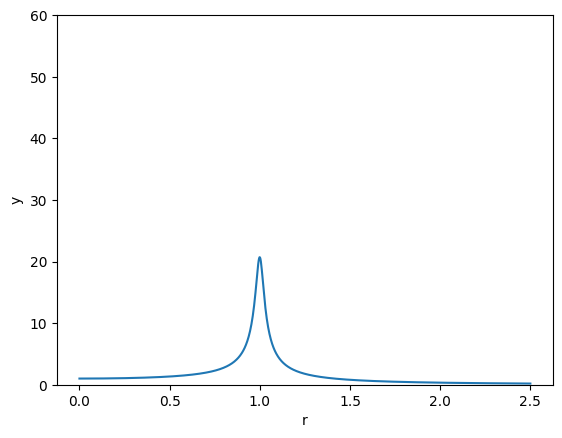

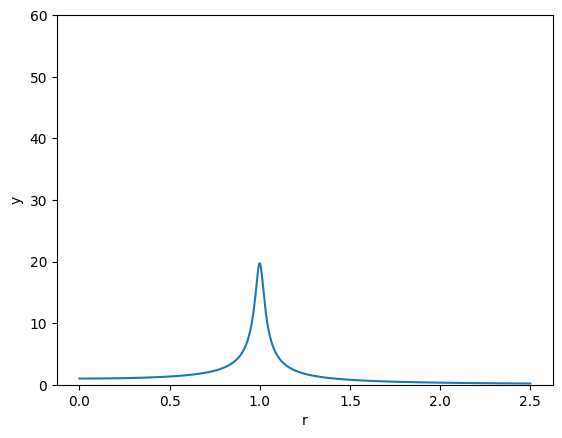

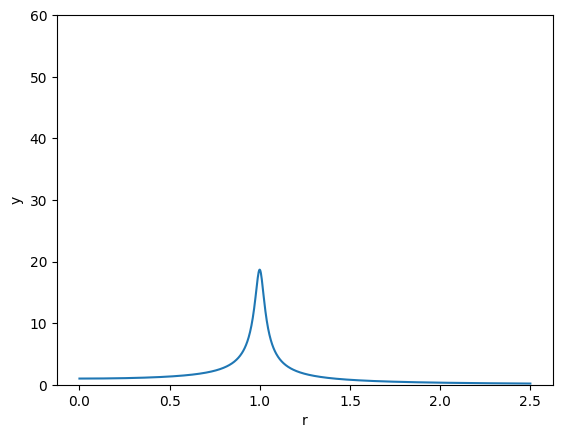

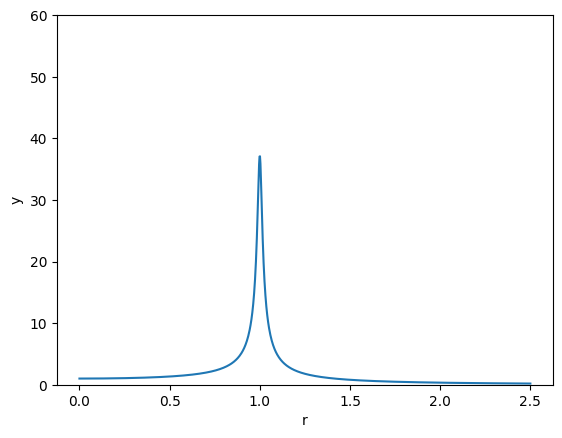

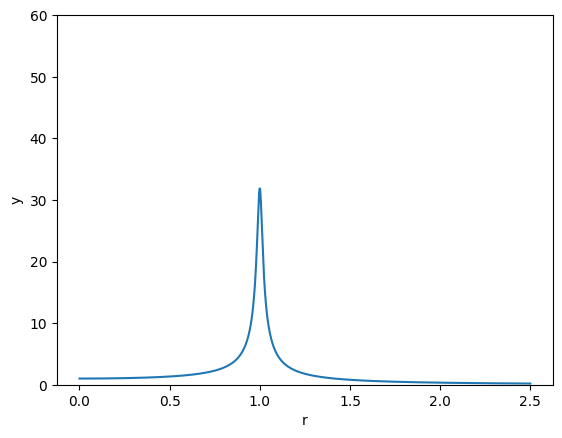

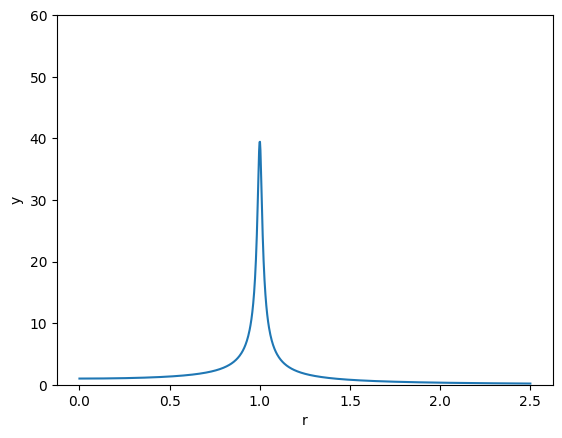

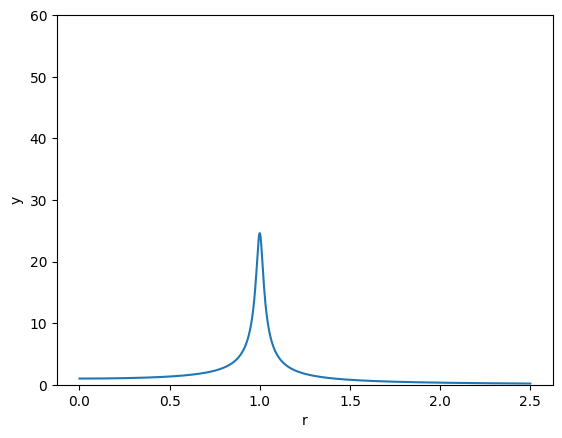

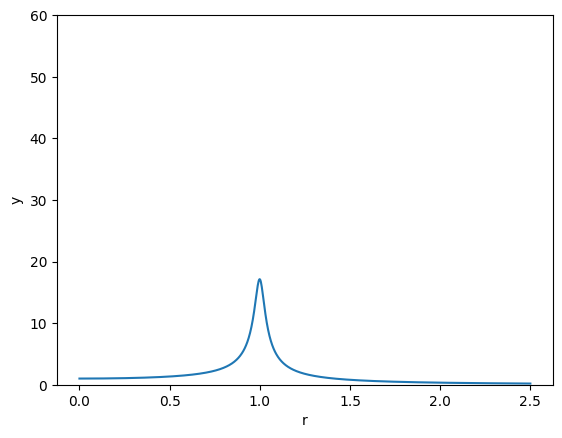

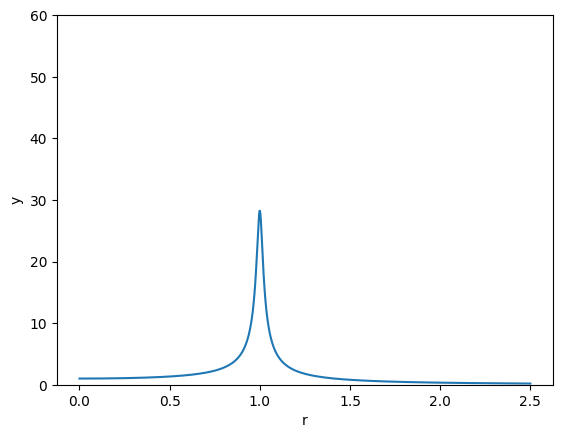

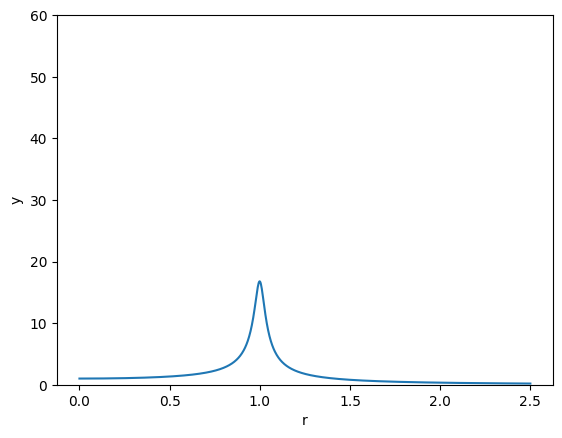

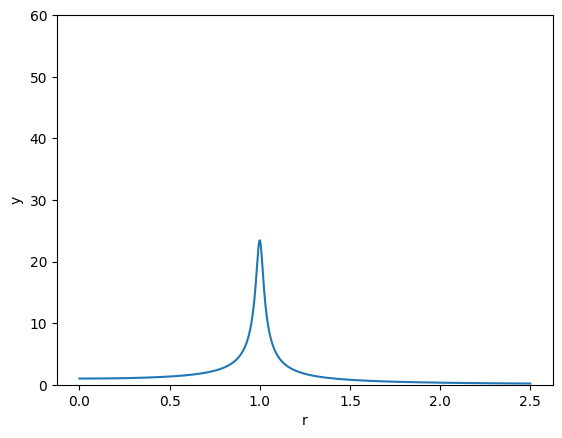

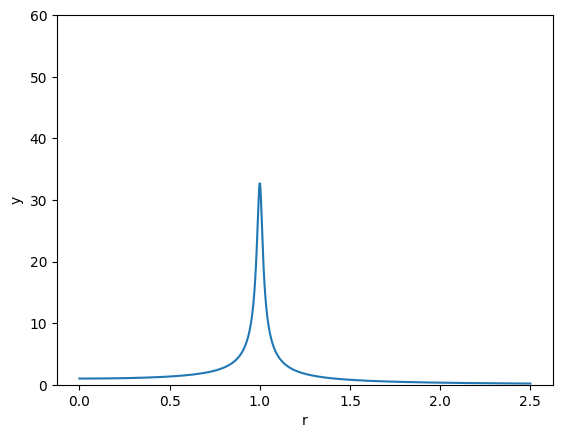

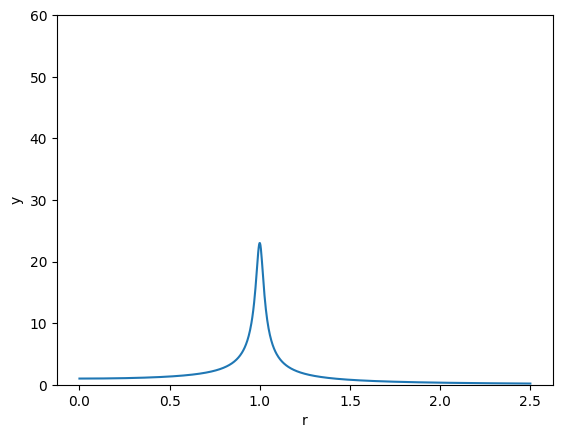

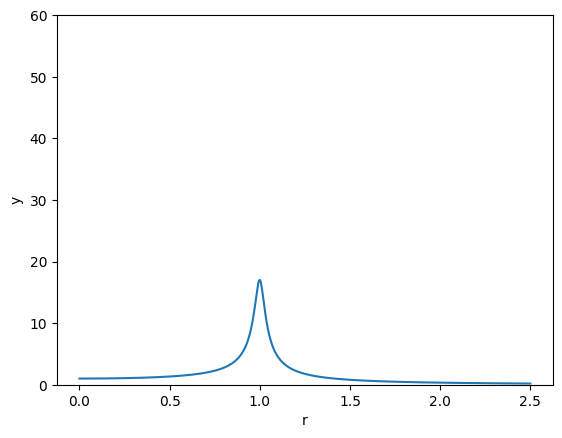

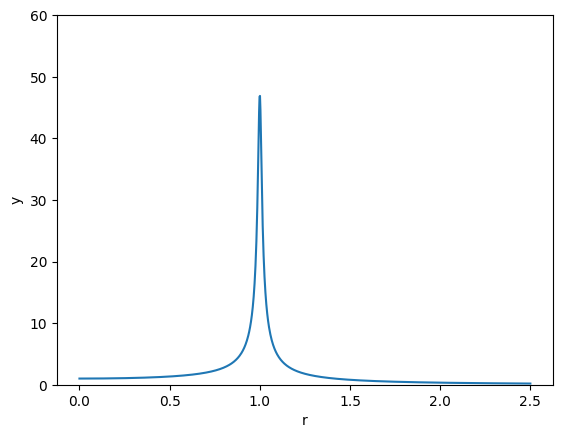

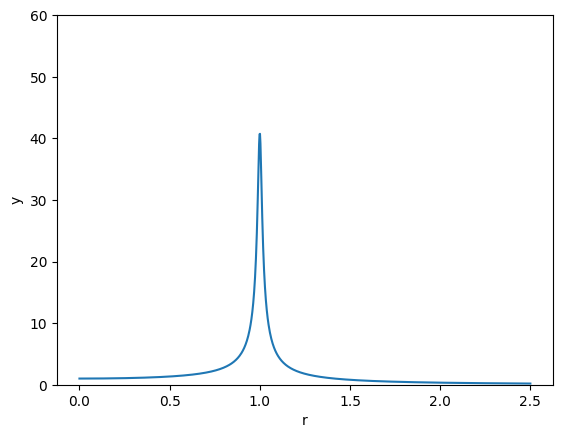

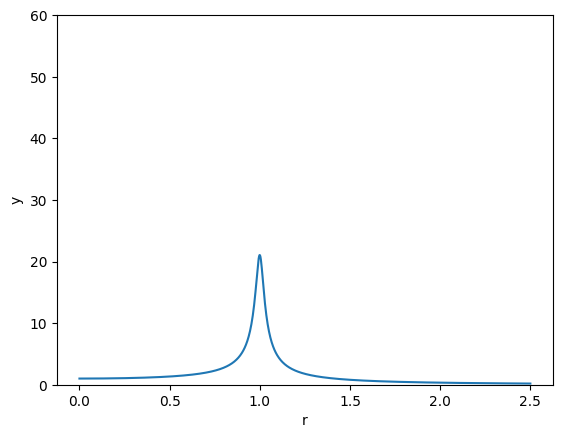

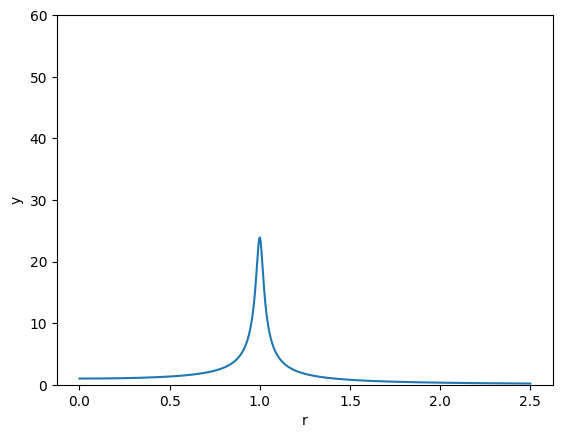

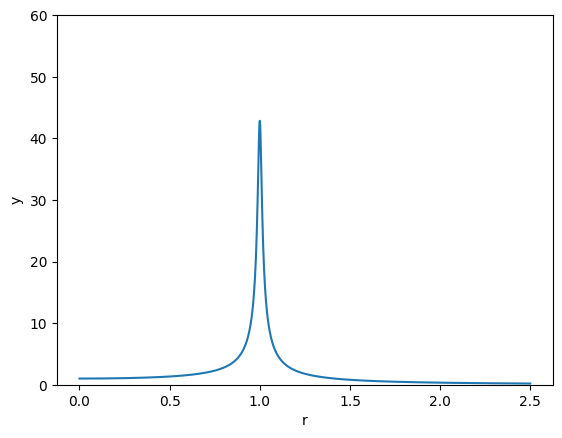

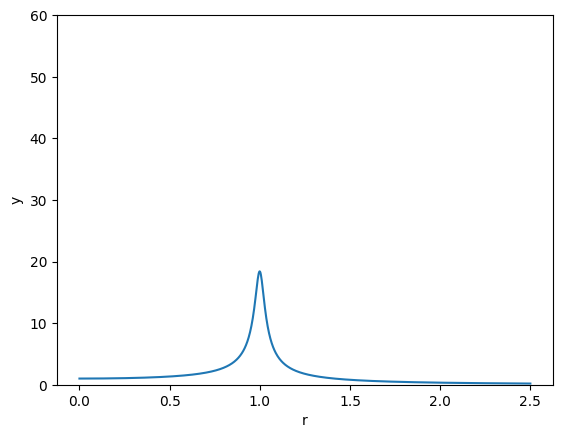

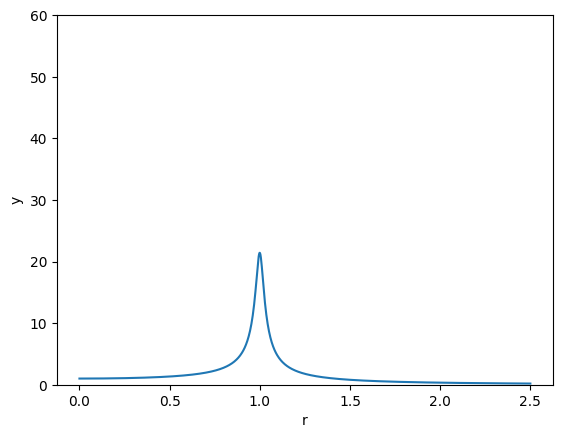

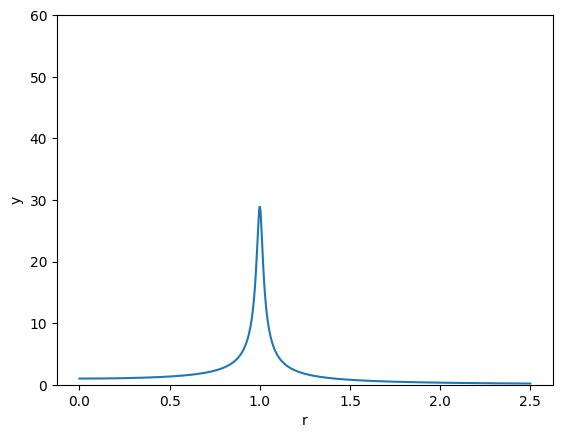

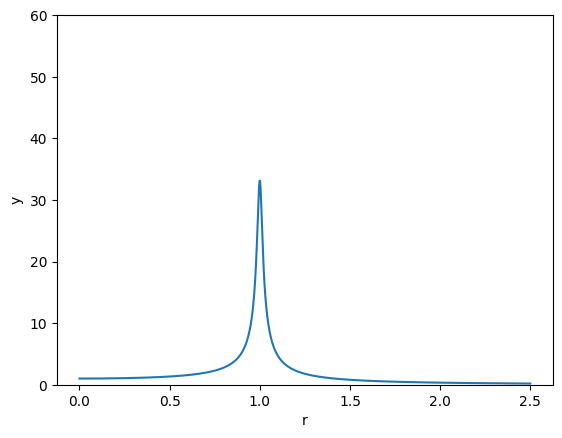

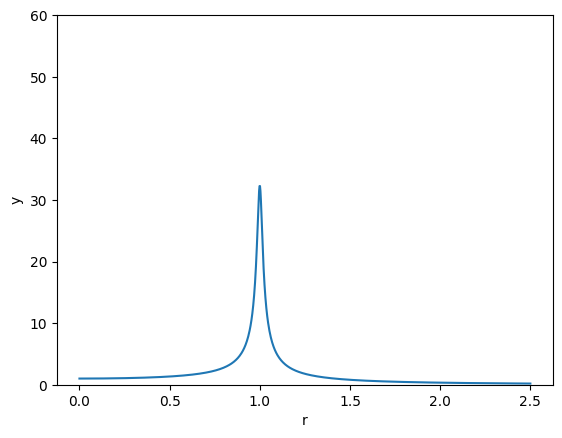

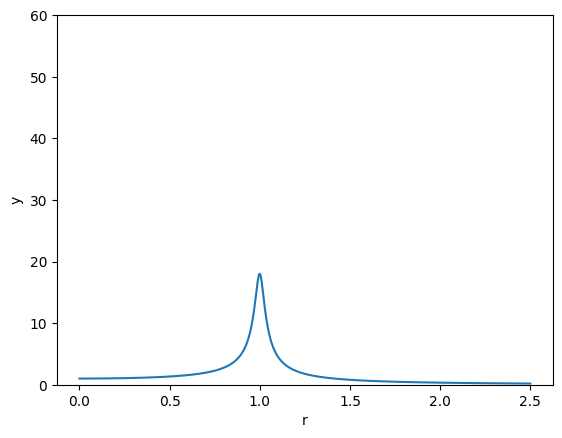

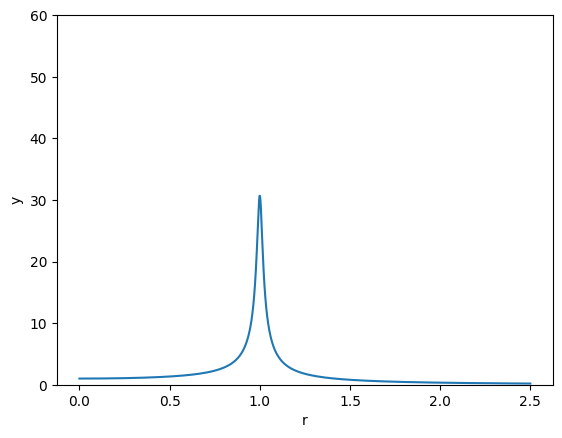

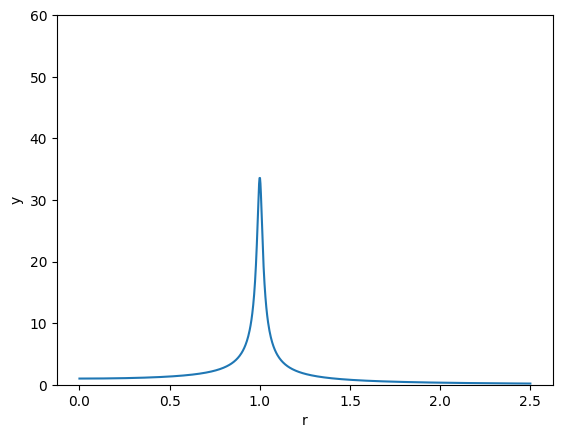

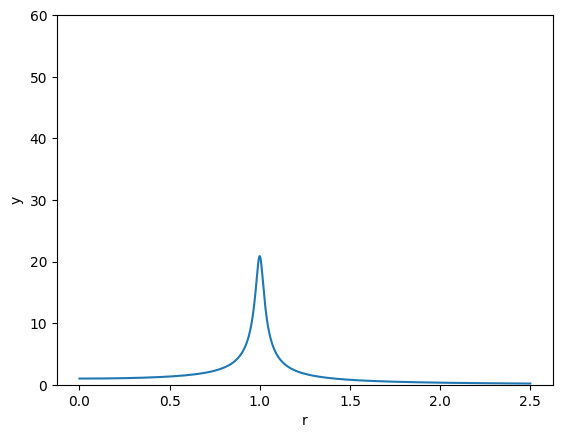

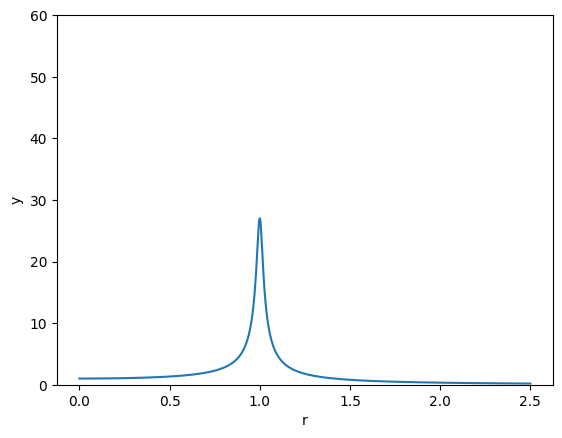

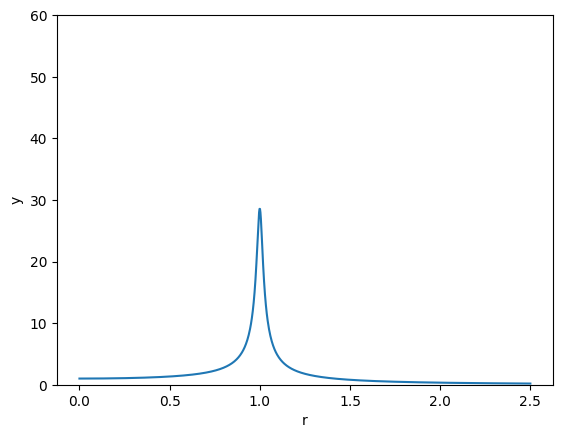

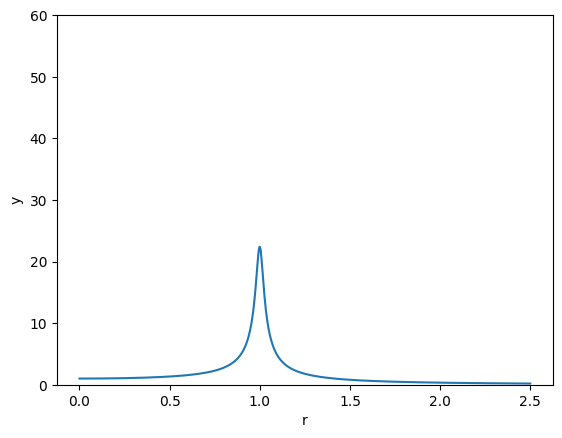

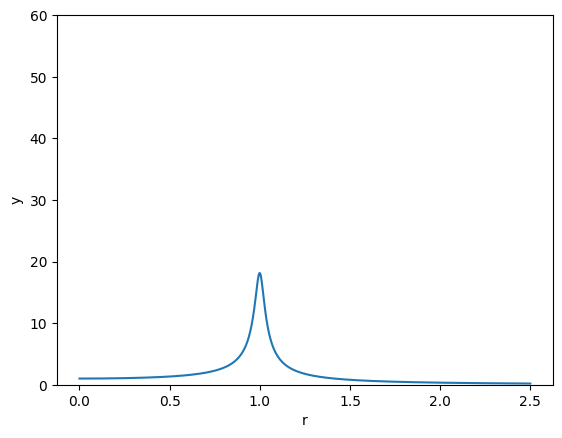

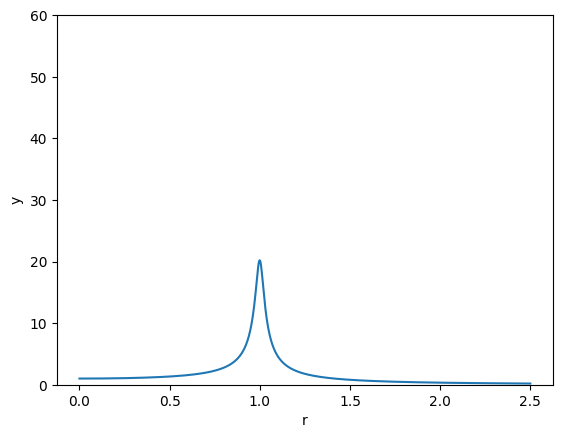

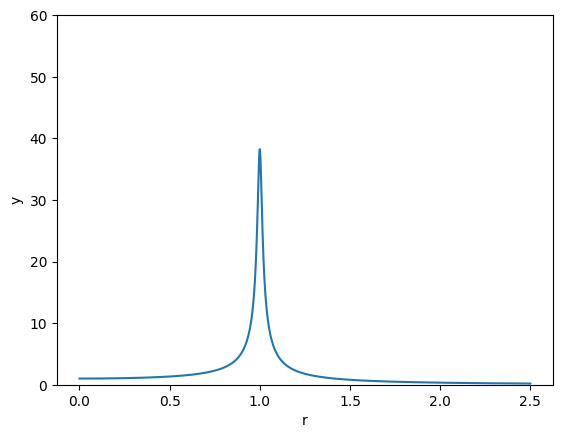

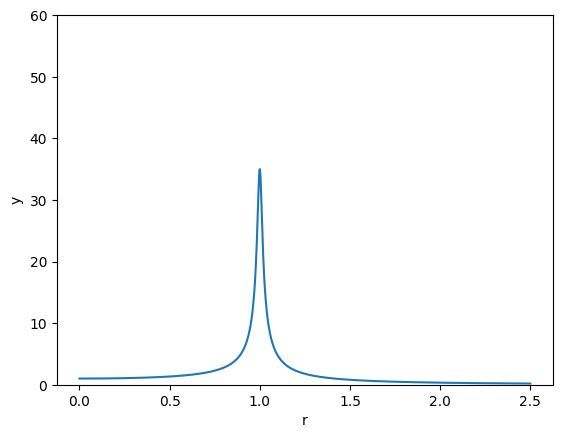

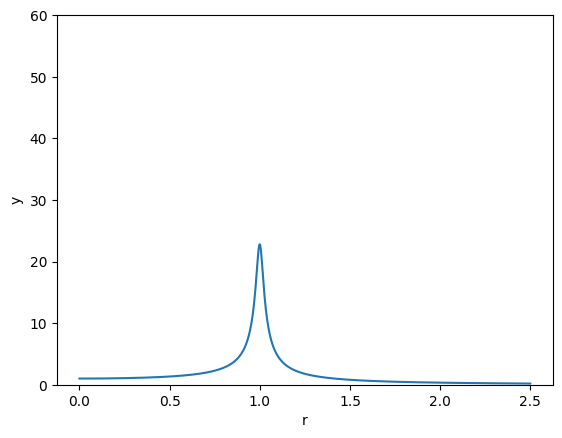

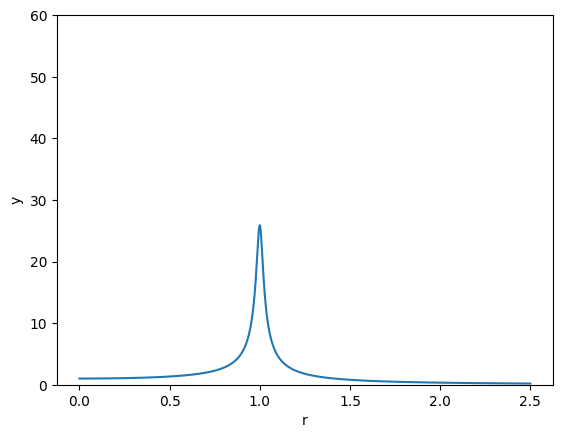

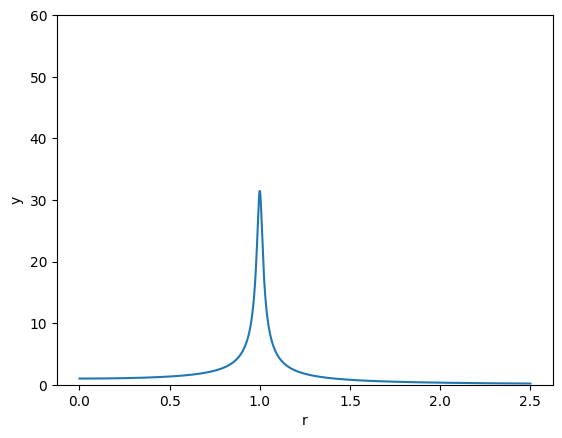

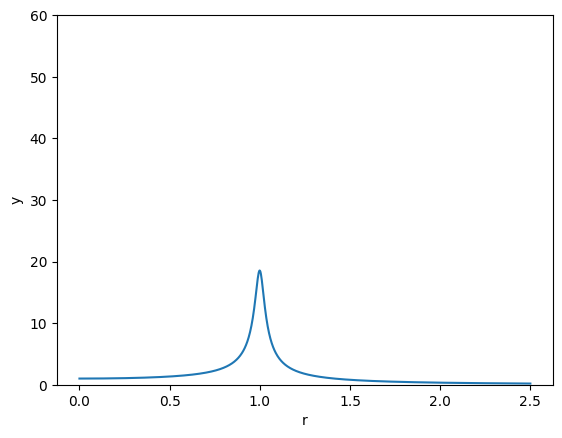

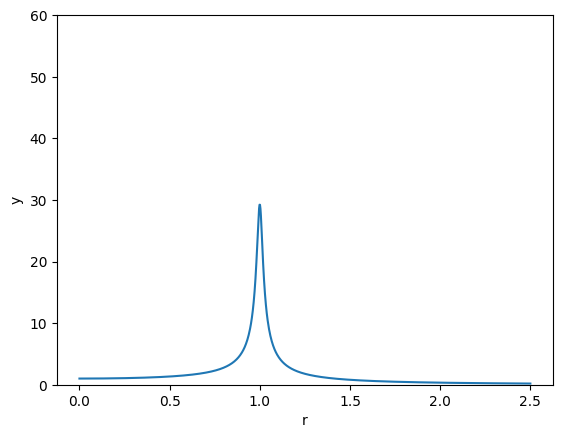

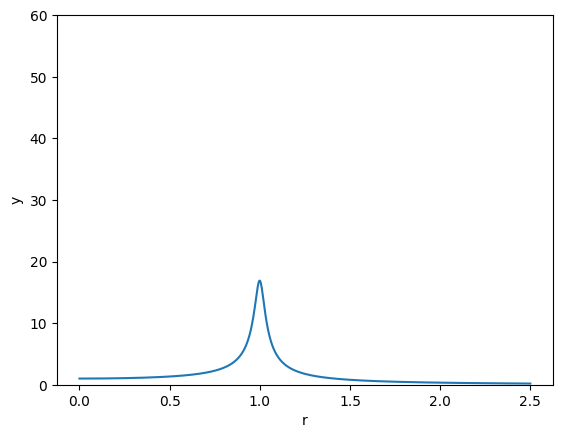

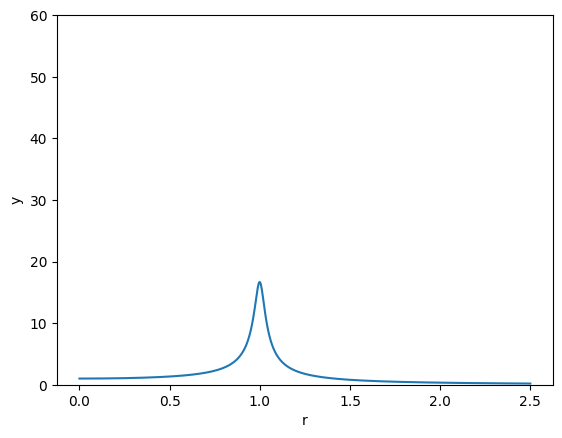

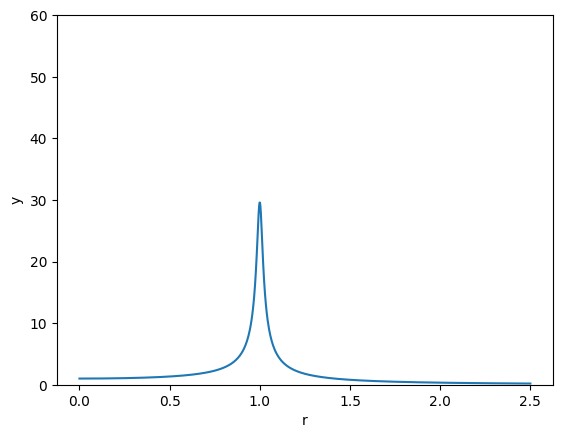

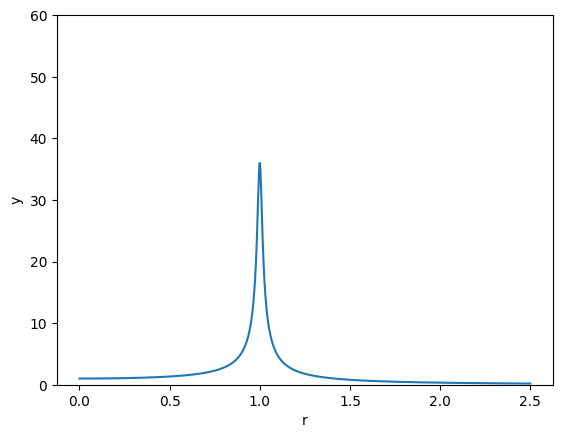

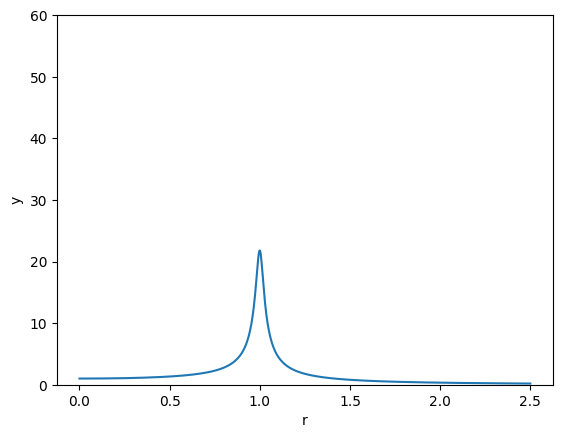

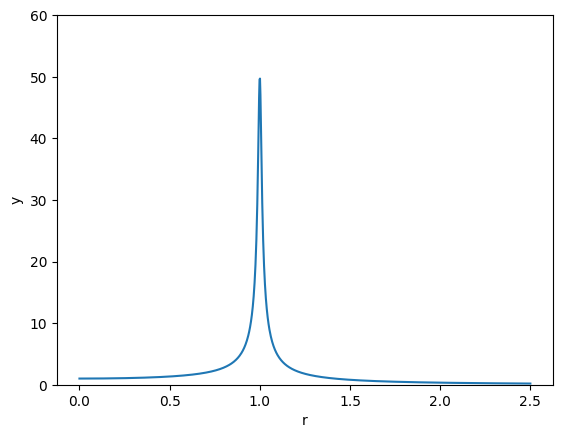

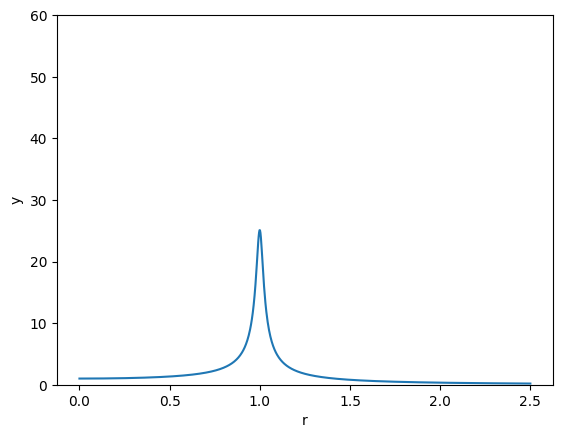

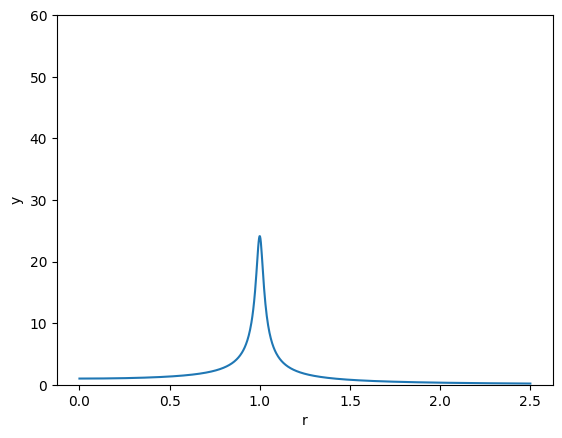

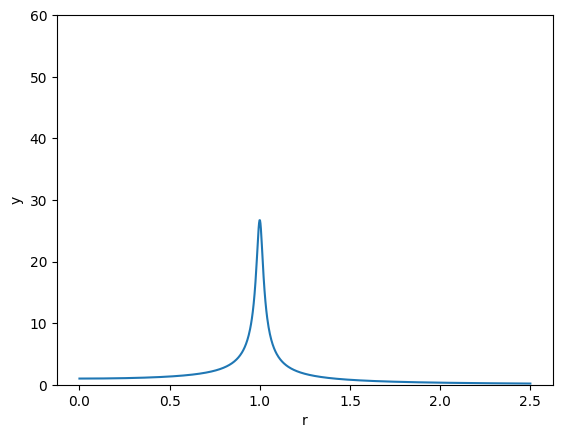

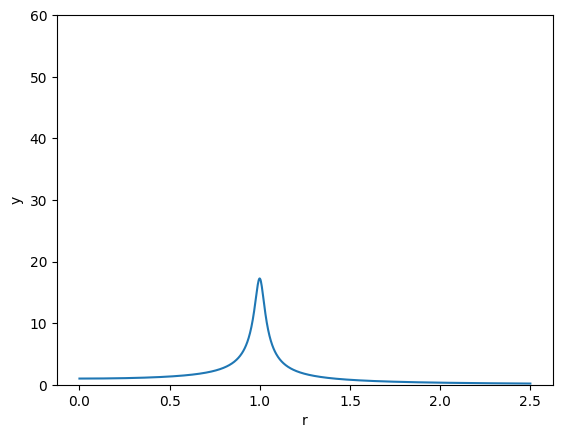

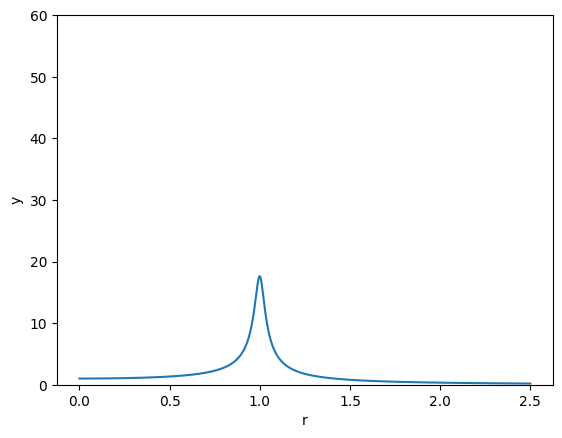

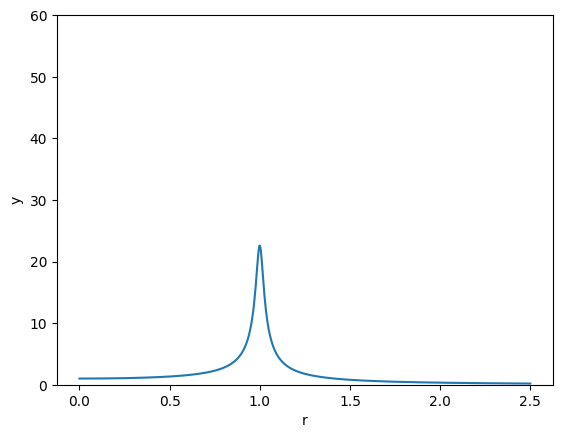

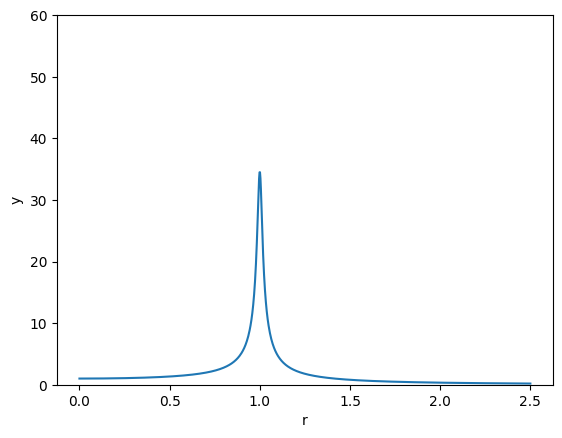

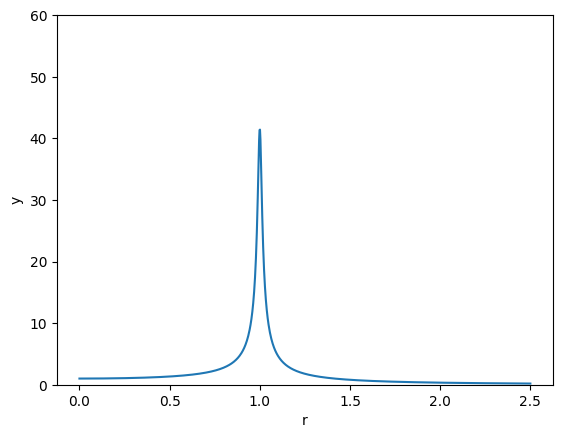

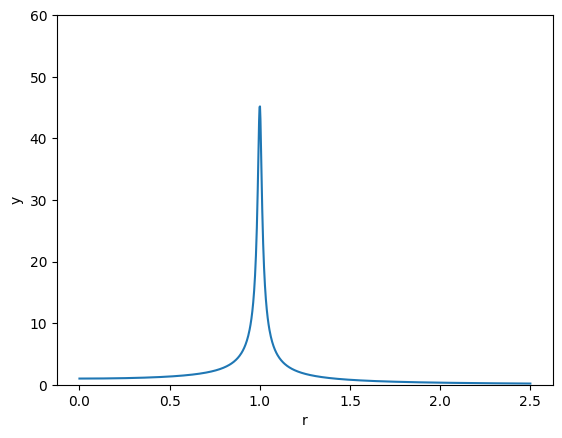

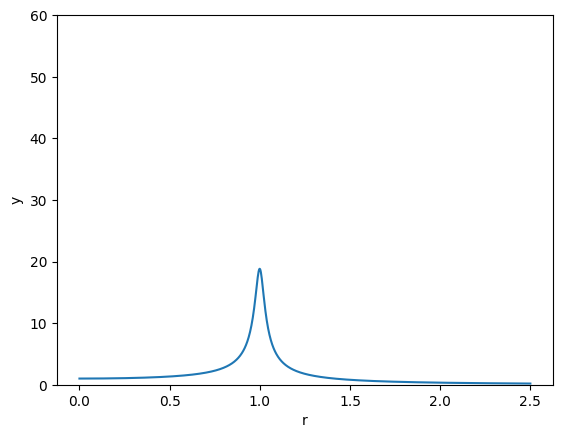

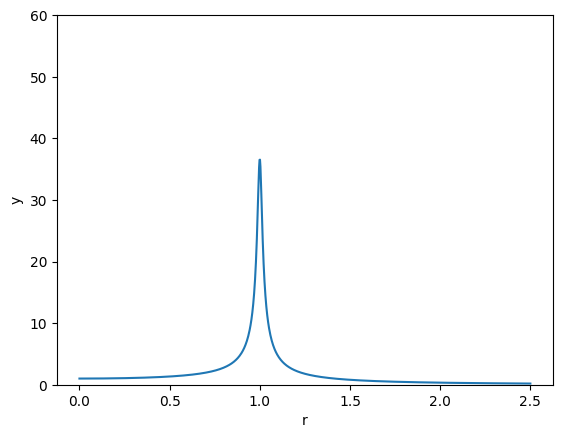

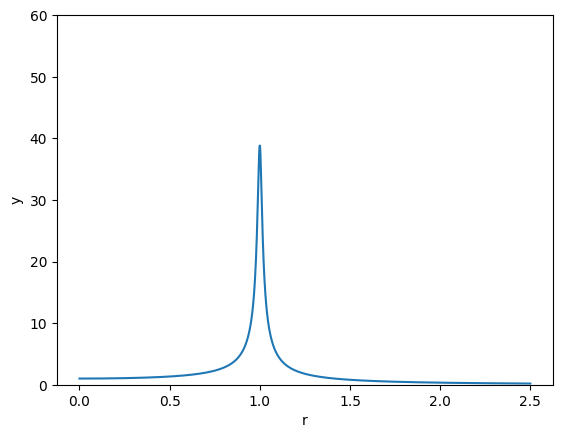

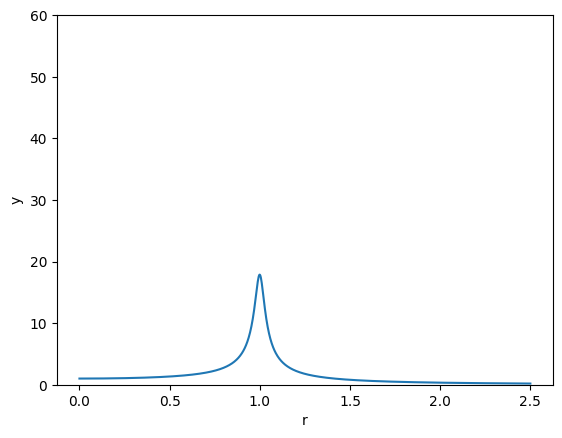

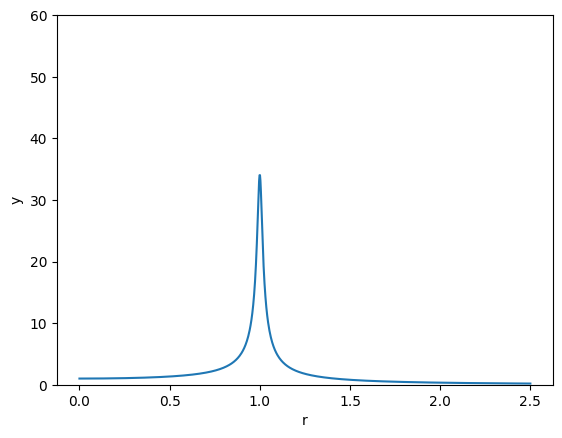

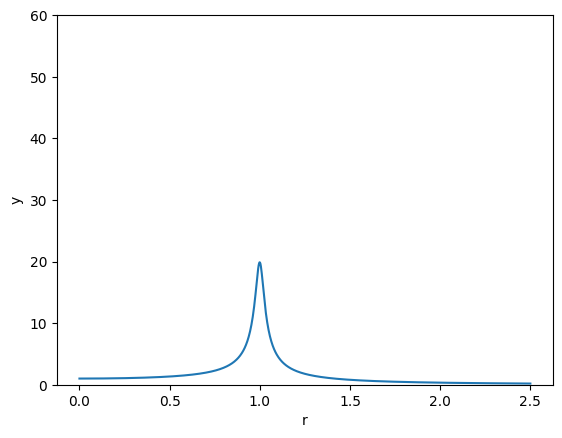

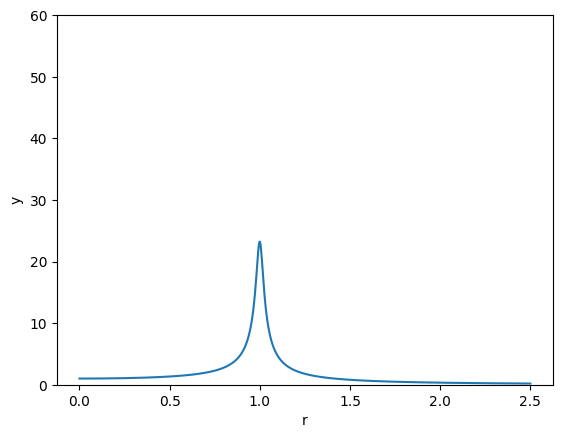

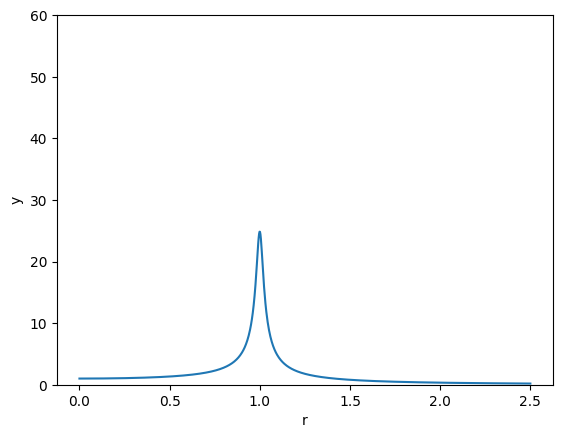

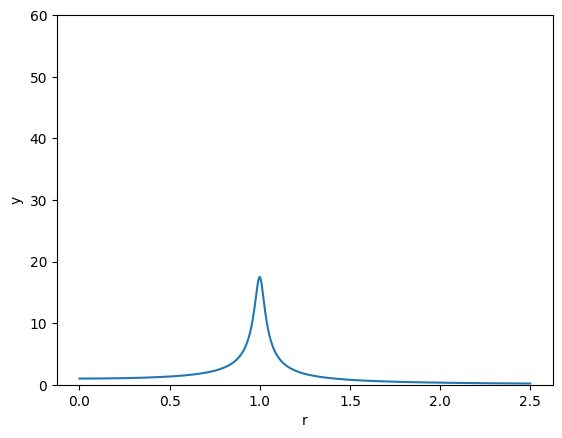

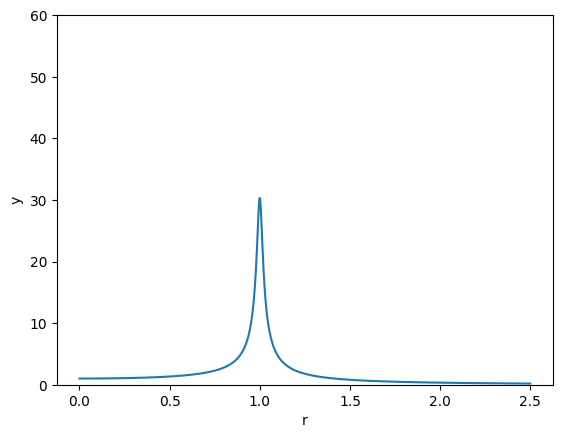

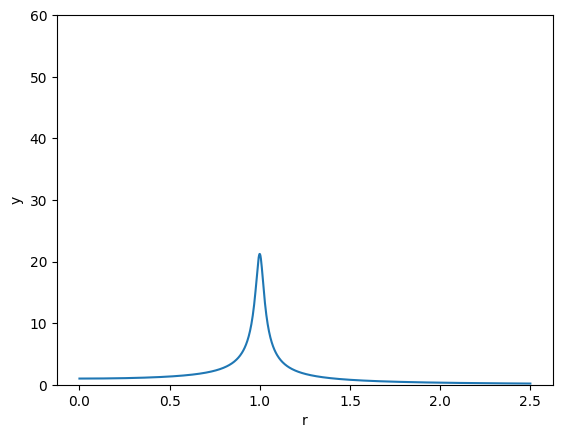

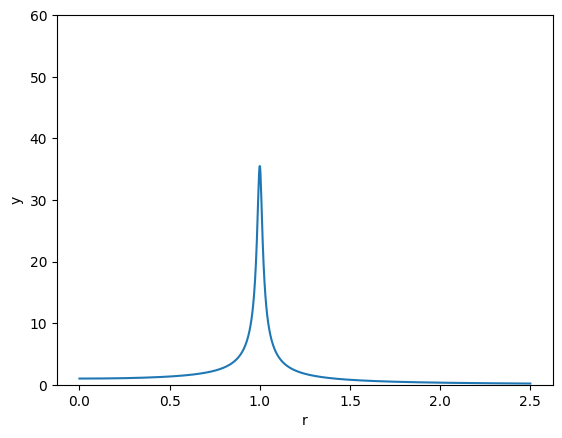

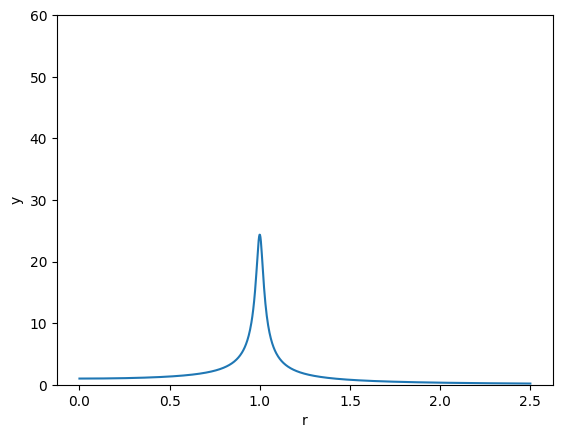

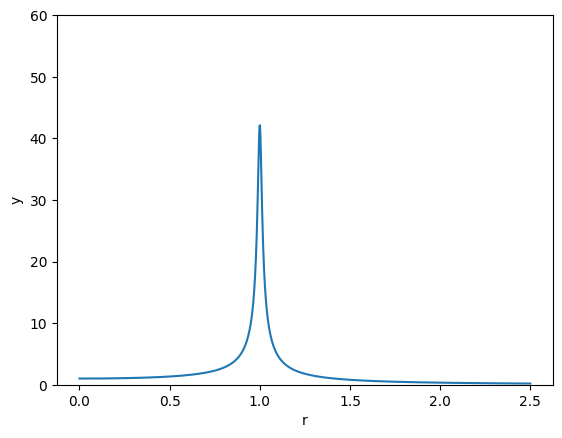

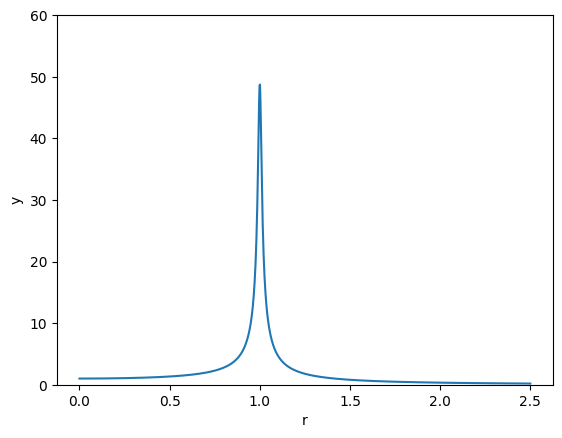

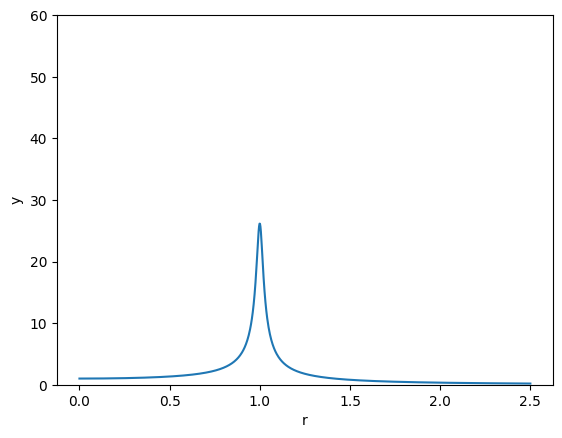

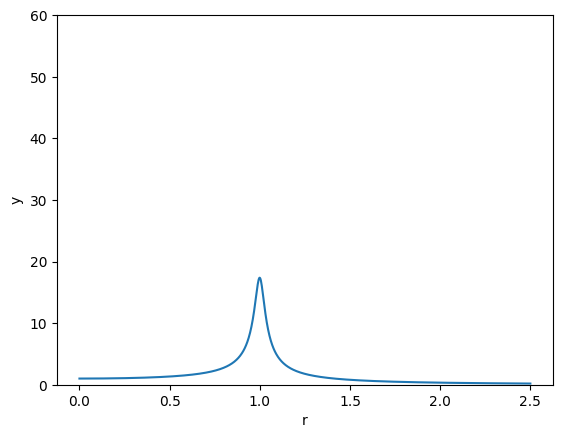

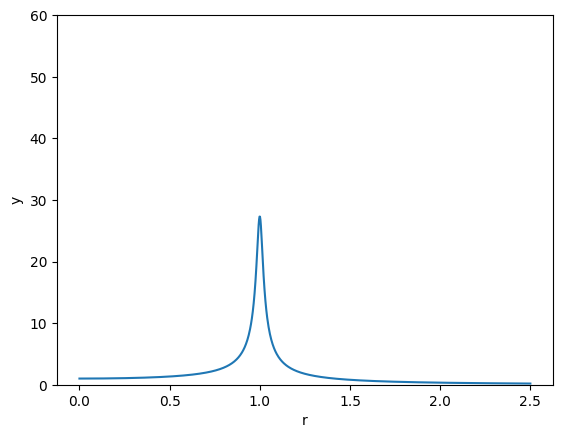

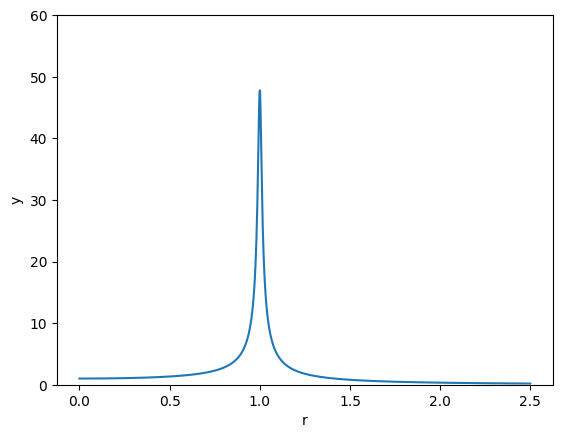

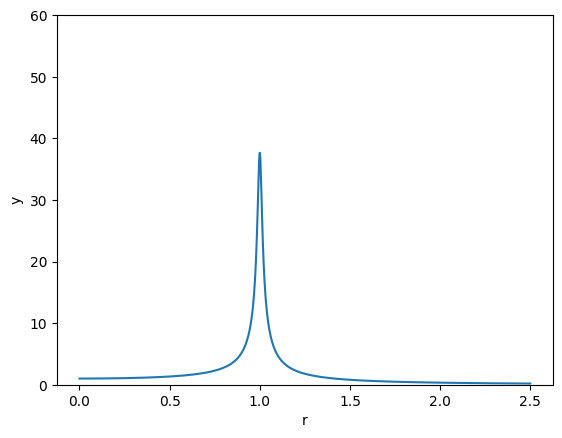

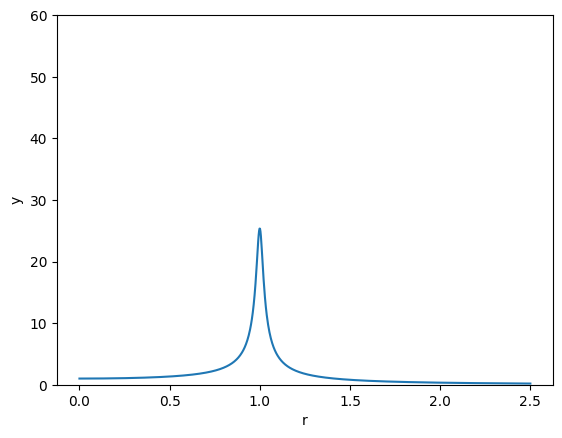

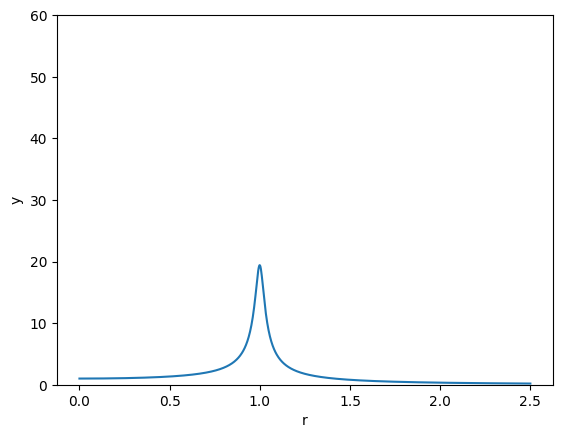

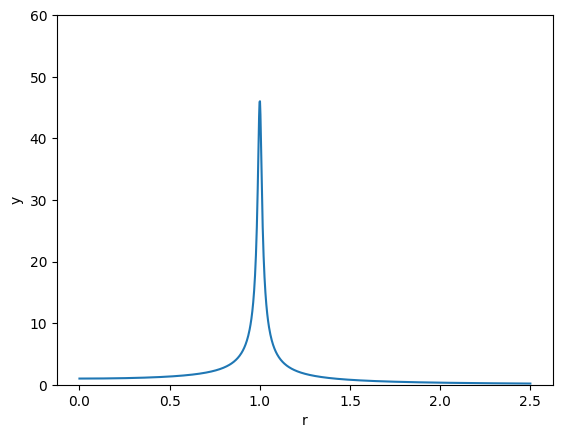

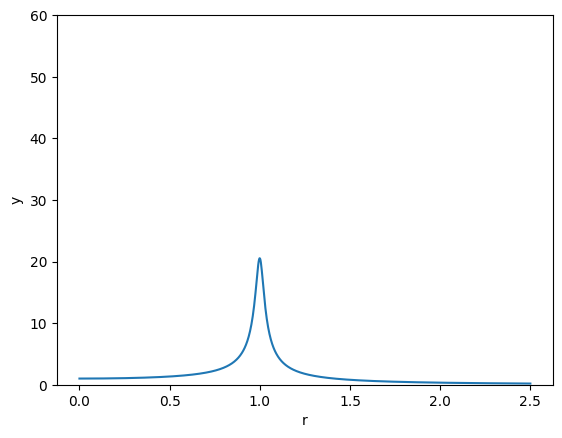

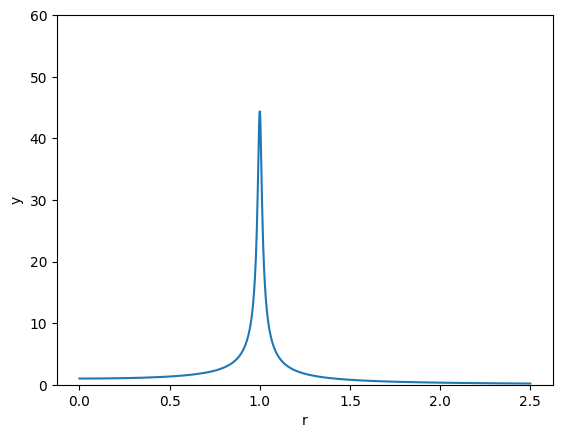

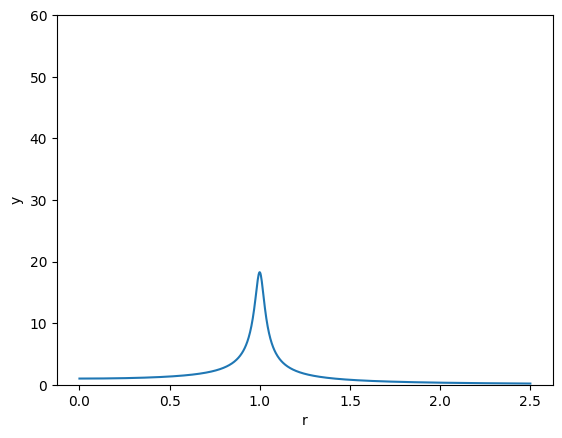

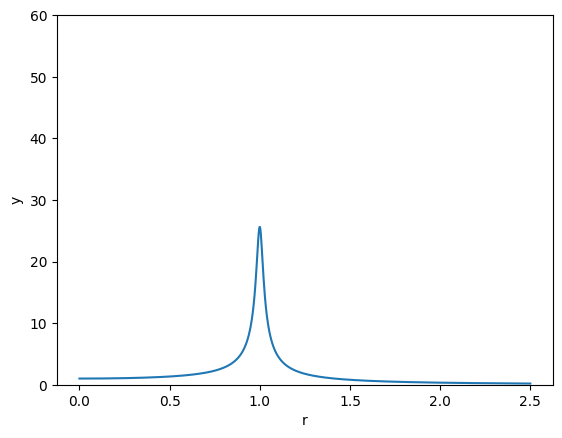

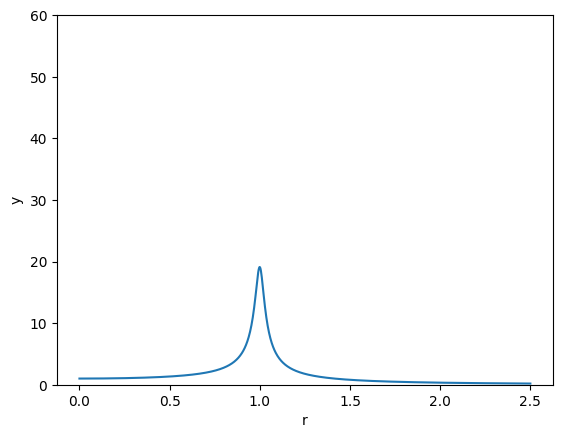

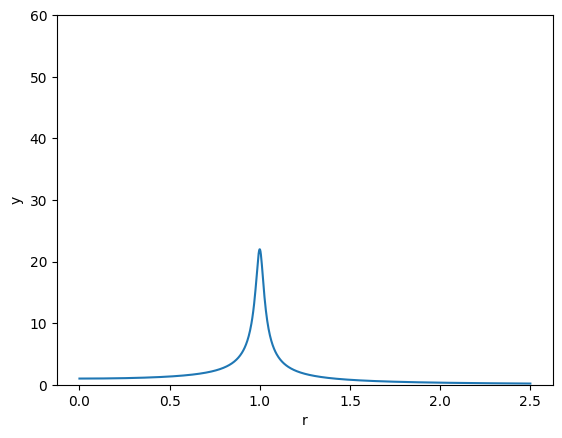

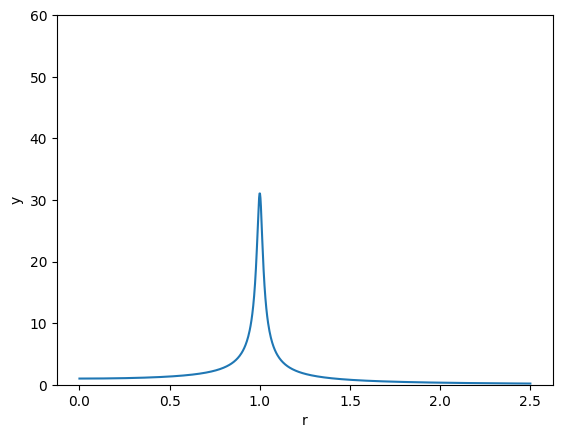

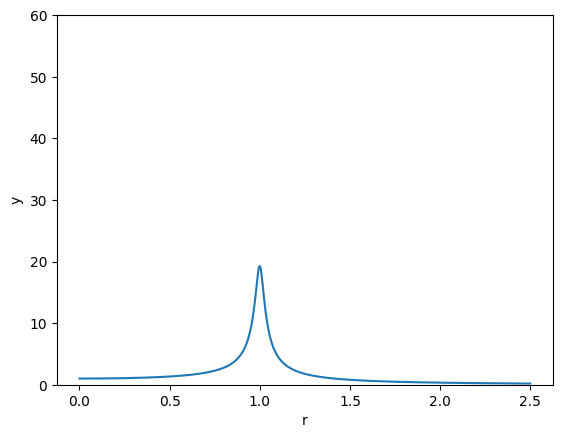

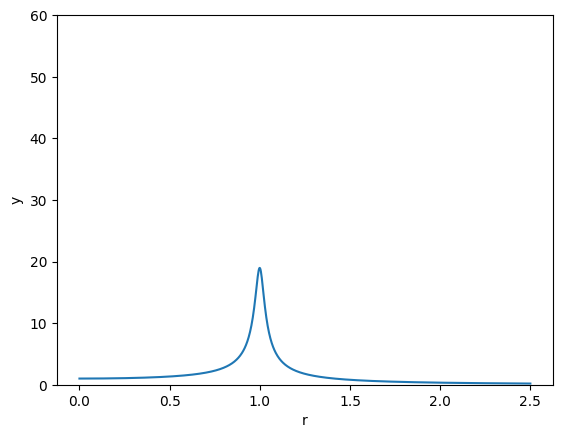

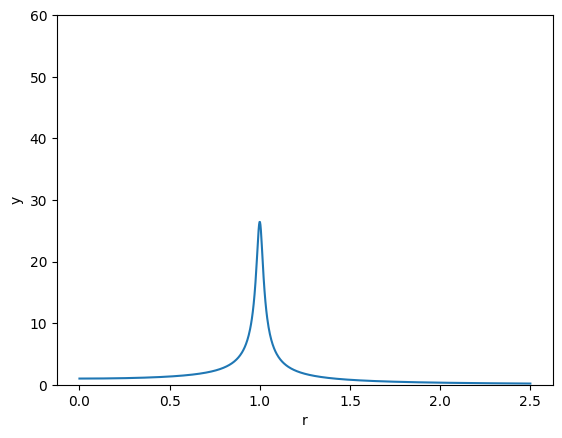

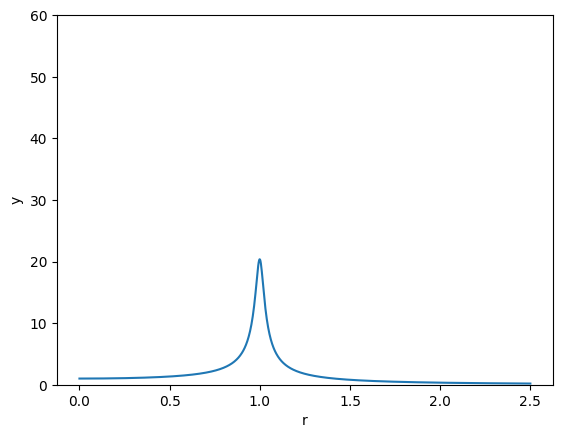

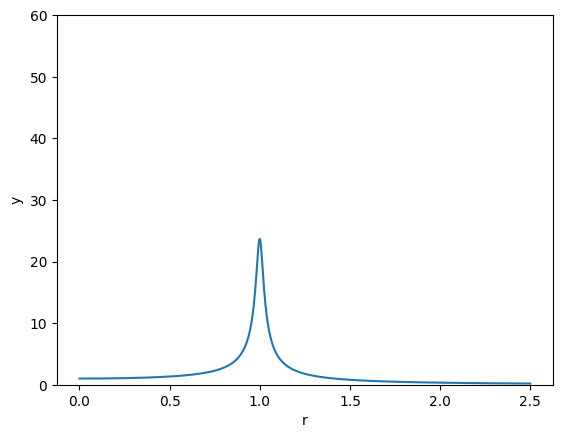

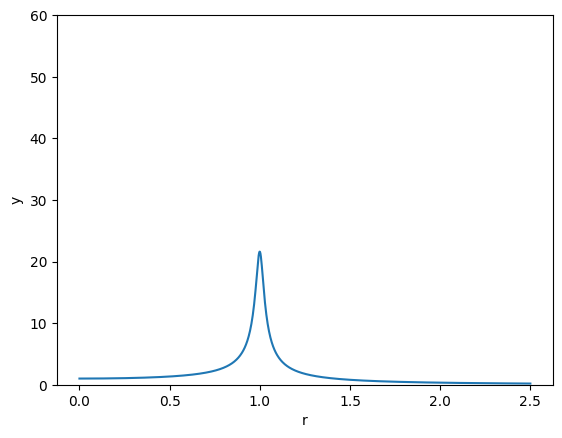

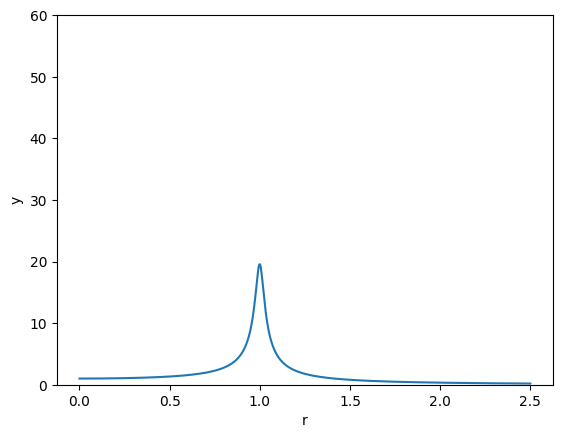

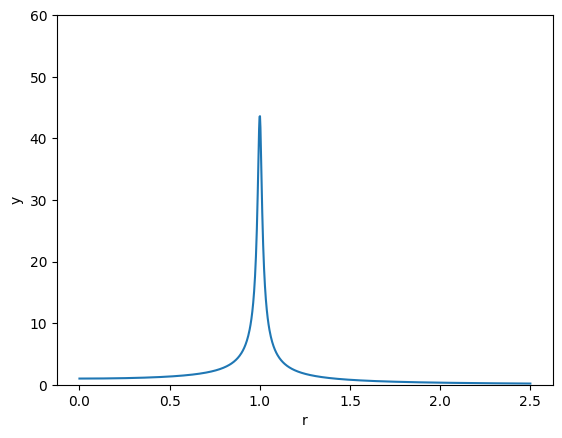

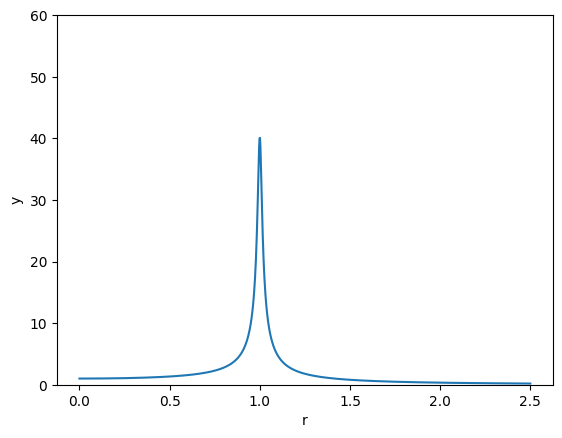

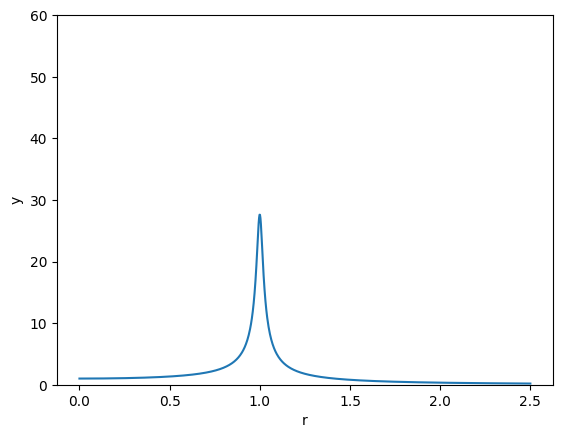

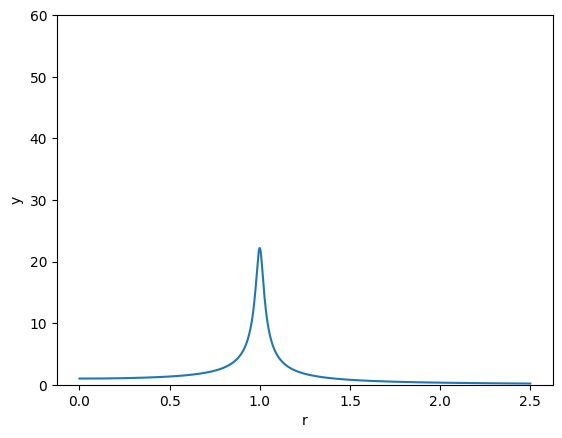

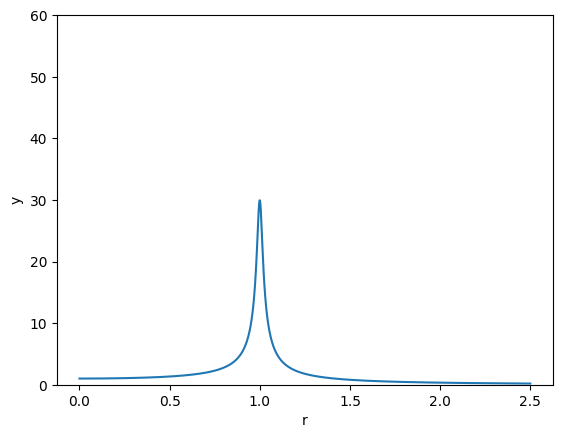

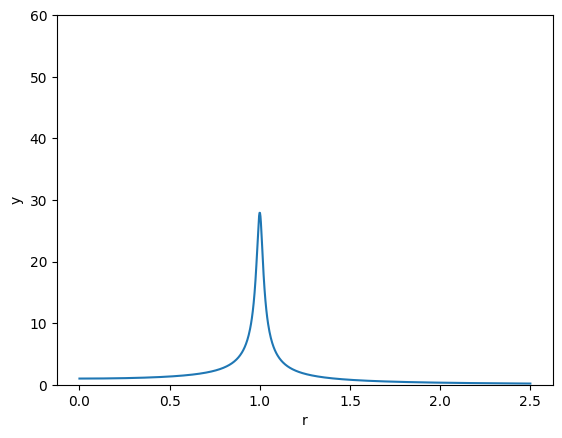

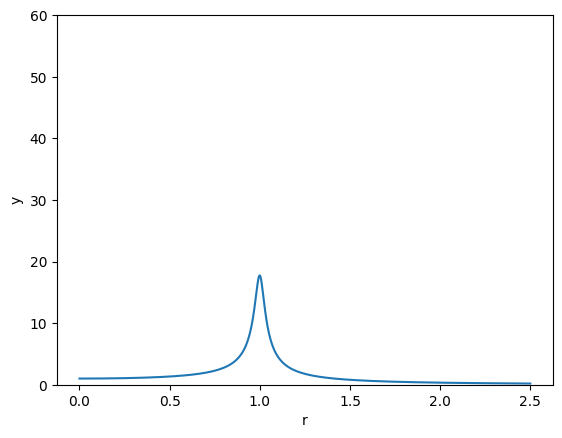

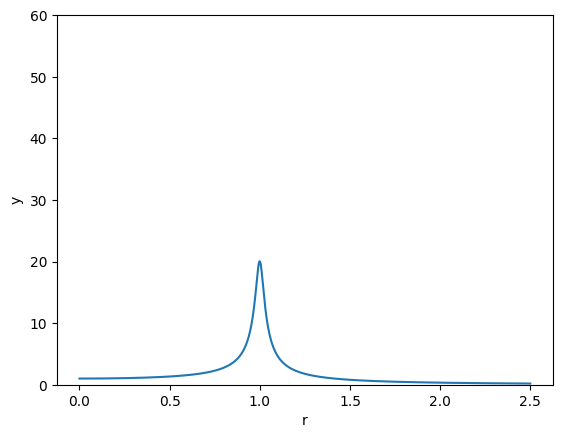

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Create a directory to store the graphs
graph_dir = "my_graphs"
if not os.path.exists(graph_dir):
    os.makedirs(graph_dir)

# y=x/xst
# r=w/wn
r = np.linspace(0, 2.5, 1000)
zeta = np.linspace(0.01, 0.03, 100)
np.random.shuffle(zeta)
labels = ["zeta = {:.4f}".format(z) for z in zeta]


i = 0
for zeta_value in zeta:
    file_name = os.path.join(graph_dir, f"zeta={zeta_value:.4f}.png")
    plt.plot(r, 1/(np.sqrt(np.square(1-np.square(r))+np.square(2*zeta_value*r))), label=labels[i])
    plt.xlabel("r")
    plt.ylabel("y")
    plt.ylim([0,60])
    plt.savefig(file_name)
    plt.show()
    i += 1

plt.close()



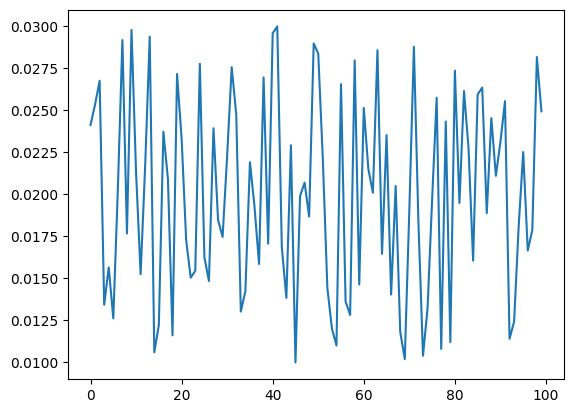

In [ ]:
plt.plot(zeta)
# print(zeta)

In [ ]:
import cv2
graph_dir = "my_grayscale_graphs"
if not os.path.exists(graph_dir):
    os.makedirs(graph_dir)

existing_graphs="my_graphs"
labels = ["zeta = {:.4f}".format(z) for z in zeta]
files = os.listdir(existing_graphs)

for file in files:
    file_path = os.path.join(existing_graphs, file)
    image = cv2.imread(file_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # cv2_imshow(gray_image)
    grayscale_image_path = os.path.join(graph_dir, "grayscale_" + file)
    cv2.imwrite(grayscale_image_path, gray_image)



In [ ]:
from PIL import Image

graph_dir = "my_resized_grayscale_graphs"
if not os.path.exists(graph_dir):
    os.makedirs(graph_dir)

existing_graphs="my_grayscale_graphs"
files = os.listdir(existing_graphs)
for file in files:
    file_path = os.path.join(existing_graphs, file)
    image = Image.open(file_path)
    resized_image = image.resize((256, 256))
    image_path = os.path.join(graph_dir, "RESIZED_" + file)
    resized_image.save(image_path)


In [ ]:
#generating all image paths locations
import numpy as np
import pandas as pd

graph_dir = "my_resized_grayscale_graphs"
files = os.listdir(existing_graphs)
file_locations=[]
for filename in files:
    file_path = os.path.join(existing_graphs, filename)
    file_locations.append(file_path)

print(len(files))
df=pd.DataFrame({'file_location':file_locations,'zeta':zeta})
print(df)


100
                                    file_location      zeta
0   my_grayscale_graphs/grayscale_zeta=0.0126.png  0.024141
1   my_grayscale_graphs/grayscale_zeta=0.0215.png  0.025354
2   my_grayscale_graphs/grayscale_zeta=0.0102.png  0.026768
3   my_grayscale_graphs/grayscale_zeta=0.0272.png  0.013434
4   my_grayscale_graphs/grayscale_zeta=0.0159.png  0.015657
..                                            ...       ...
95  my_grayscale_graphs/grayscale_zeta=0.0294.png  0.022525
96  my_grayscale_graphs/grayscale_zeta=0.0138.png  0.016667
97  my_grayscale_graphs/grayscale_zeta=0.0195.png  0.017879
98  my_grayscale_graphs/grayscale_zeta=0.0252.png  0.028182
99  my_grayscale_graphs/grayscale_zeta=0.0179.png  0.024949

[100 rows x 2 columns]


In [ ]:
import tensorflow as tf
import keras

In [ ]:
#doing using built_in code
#this is not required as of now


# train_generator=tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

# train_images=train_generator.flow_from_dataframe(
#     dataframe=df,
#     x_col='file_location',
#     y_col='zeta',
#     target_size=(256,256),
#     color_mode='grayscale',
#     class_mode='raw',#used for regression
#     batch_size=2,
#     shuffle=True,
#     seed=42,
#     subset='training'

# )
# #this is not required as of now
# val_images = train_generator.flow_from_dataframe(
#     dataframe=df,
#     x_col='file_location',
#     y_col='zeta',
#     target_size=(256,256),
#     color_mode='grayscale',
#     class_mode='raw',#used for regression
#     batch_size=2,
#     shuffle=True,
#     seed=42,
#     subset='validation'
# )



In [ ]:
#building architecture copy paste https://www.kaggle.com/code/gcdatkin/age-prediction-from-images-cnn-regression?scriptVersionId=55328788&cellId=14
# import keras

# inputs=tf.keras.Input(shape=(256,256,3))
# x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
# # x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.MaxPool2D()(x)
# # flatten
# # x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
# # x = tf.keras.layers.MaxPool2D()(x)
# # x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dense(64, activation='relu')(x)
# x = tf.keras.layers.Dense(32, activation='relu')(x)
# outputs = tf.keras.layers.Dense(1, activation='linear')(x)

# model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

#original model
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256, 256, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='linear'))

#copypaste1
# model = Sequential()
# model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(256, 256, 1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(120, activation='relu'))
# model.add(Dense(84, activation='relu'))
# model.add(Dense(1, activation='linear'))

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256, 256, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


In [ ]:
from keras.optimizers import SGD
from keras.metrics import RootMeanSquaredError

model.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='mse',
    metrics=[RootMeanSquaredError()]
)



In [ ]:
import numpy as np
import os

# Get the list of image files
image_files = os.listdir('/content/my_resized_grayscale_graphs')
x_train = []

for image_file in image_files:
    image = cv2.imread(f'/content/my_resized_grayscale_graphs/{image_file}',0)
    image_array = np.array(image)
    x_train.append(image_array)

x_train = np.array(x_train)
x_train=x_train/255

print(x_train)
# print(zeta)

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 ...

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]]


In [ ]:
print(x_train.shape)

(100, 256, 256)


In [ ]:
history=model.fit(x_train,zeta,epochs=15,batch_size=15,verbose=1)
# print(zeta)

Epoch 1/15
7/7 [==============================] - 5s 655ms/step - loss: 1942.7505 - root_mean_squared_error: 44.0766
Epoch 2/15
7/7 [==============================] - 3s 422ms/step - loss: 0.1821 - root_mean_squared_error: 0.4268
Epoch 3/15
7/7 [==============================] - 3s 389ms/step - loss: 0.0201 - root_mean_squared_error: 0.1418
Epoch 4/15
7/7 [==============================] - 3s 394ms/step - loss: 0.0314 - root_mean_squared_error: 0.1771
Epoch 5/15
7/7 [==============================] - 3s 418ms/step - loss: 0.0192 - root_mean_squared_error: 0.1387
Epoch 6/15
7/7 [==============================] - 4s 632ms/step - loss: 0.0026 - root_mean_squared_error: 0.0507
Epoch 7/15
7/7 [==============================] - 3s 392ms/step - loss: 0.0061 - root_mean_squared_error: 0.0784
Epoch 8/15
7/7 [==============================] - 3s 393ms/step - loss: 6.7006e-04 - root_mean_squared_error: 0.0259
Epoch 9/15
7/7 [==============================] - 3s 396ms/step - loss: 0.0011 - root_me

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 262144)            0         
                                                                 
 dense (Dense)               (None, 64)                16777280  
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                        

In [ ]:
print (history)

In [ ]:
model.save('my_model_linear_with flatten.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#testing data
#make a new graph set to test
import os
import numpy as np
import matplotlib.pyplot as plt

graph_dir = "my_test_graphs"
if not os.path.exists(graph_dir):
    os.makedirs(graph_dir)

r = np.linspace(0, 2.5, 1000)
zeta = np.linspace(0.01, 0.03, 30)
np.random.shuffle(zeta)
labels = ["zeta = {:.4f}".format(z) for z in zeta]

# Generate a unique file name for each graph
i = 0
for zeta_value in zeta:
    file_name = os.path.join(graph_dir, f"zeta={zeta_value:.4f}.png")
    plt.plot(r, 1/(np.sqrt(np.square(1-np.square(r))+np.square(2*zeta_value*r))), label=labels[i])
    plt.xlabel("r")
    plt.ylabel("y")
    # plt.legend()
    plt.ylim([0,60])
    plt.savefig(file_name)
    i += 1

# Close the plot window
plt.close()


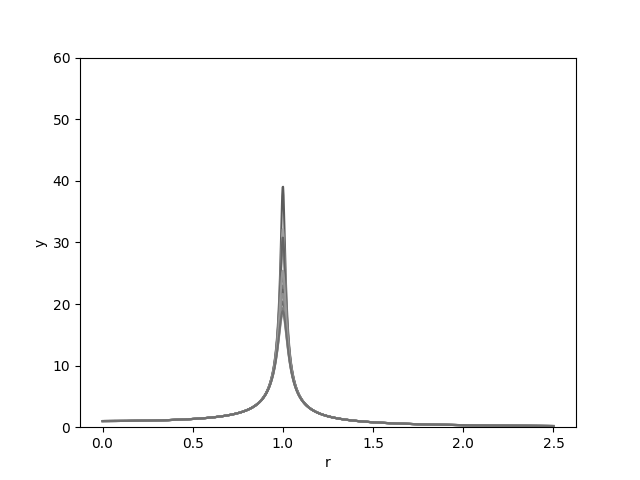

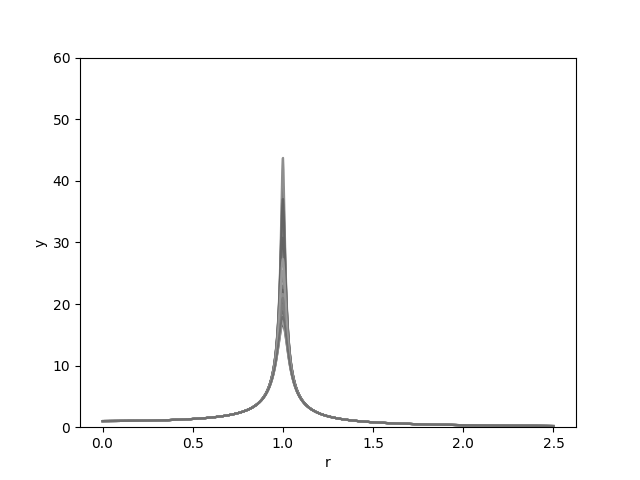

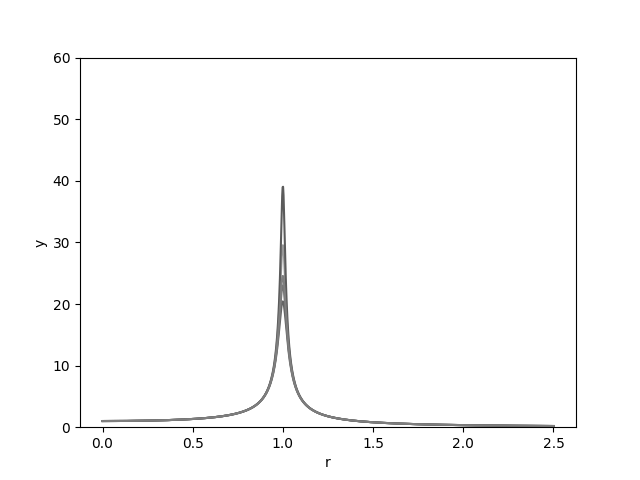

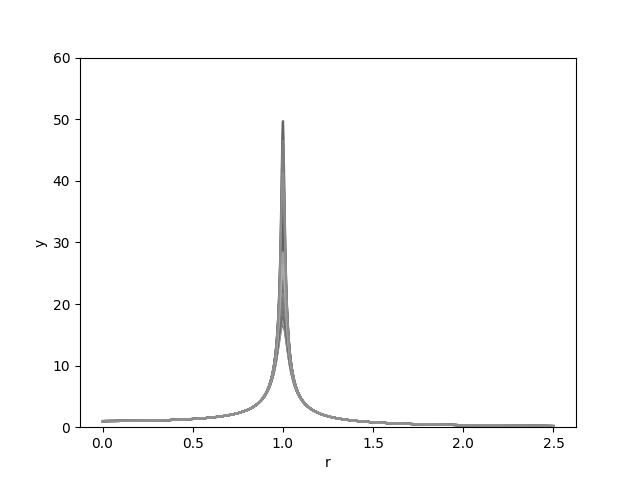

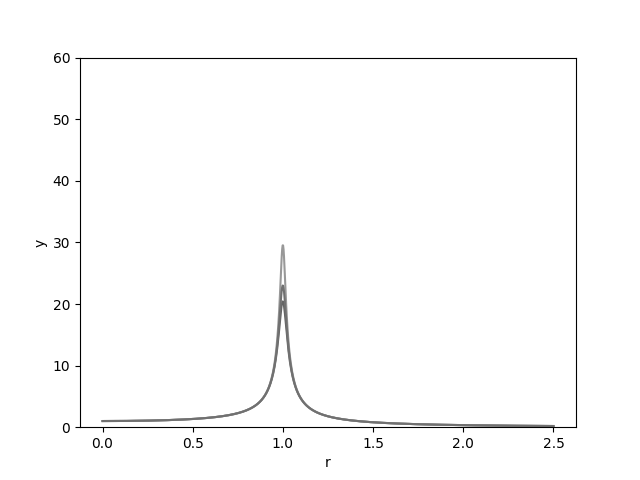

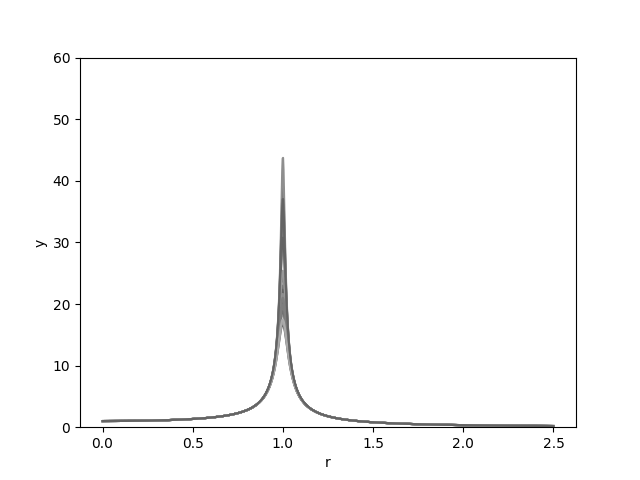

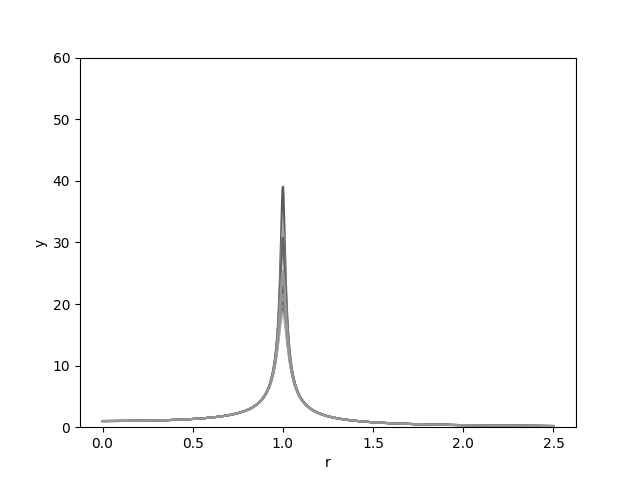

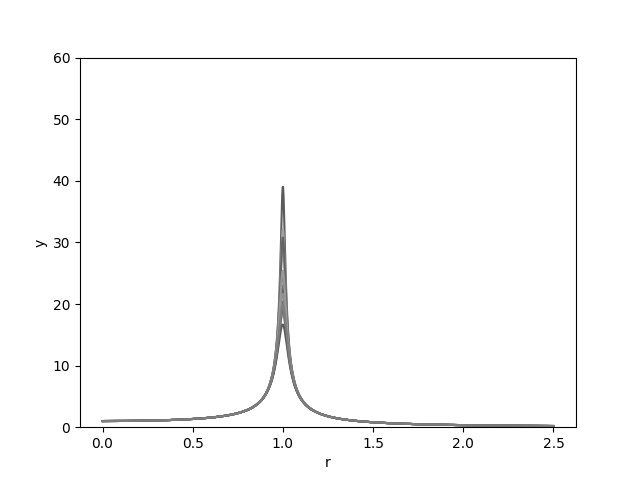

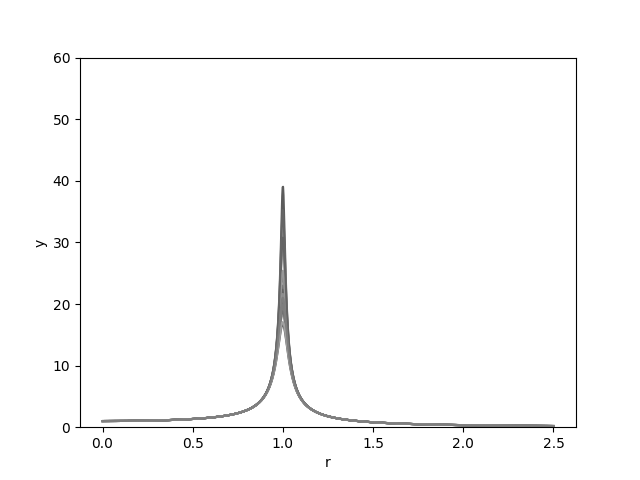

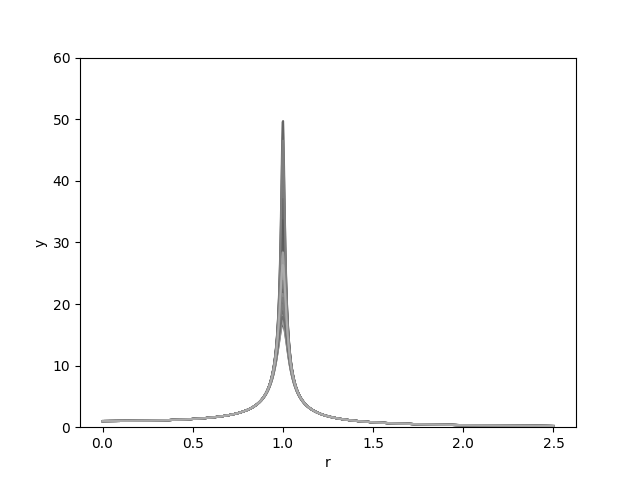

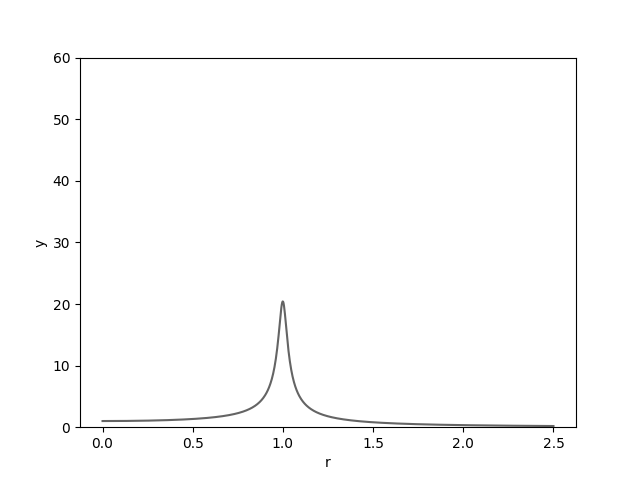

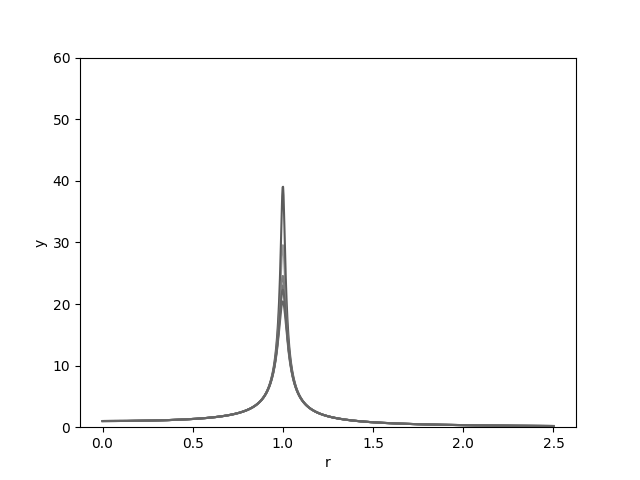

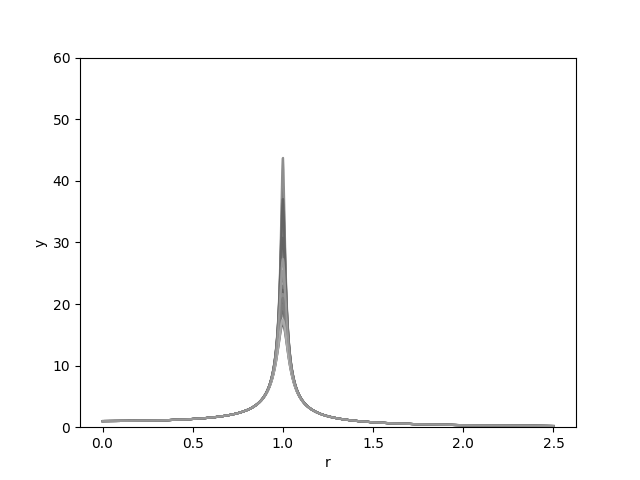

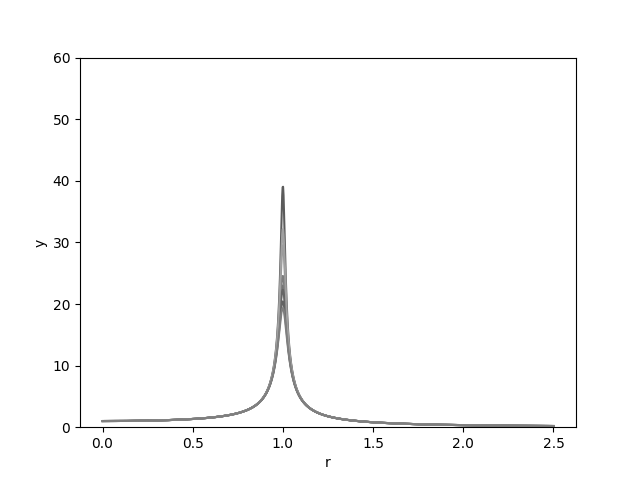

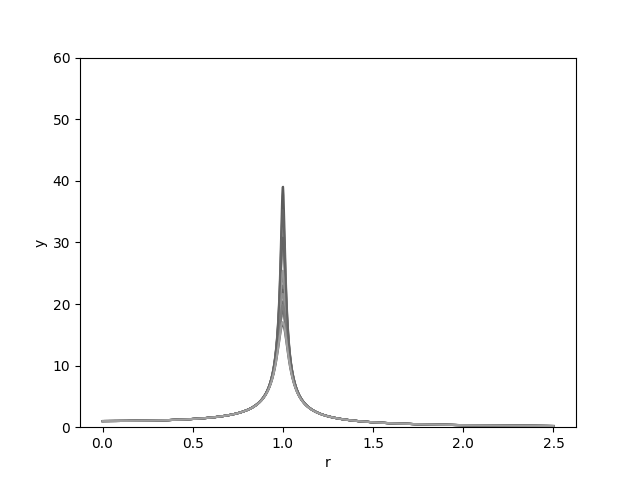

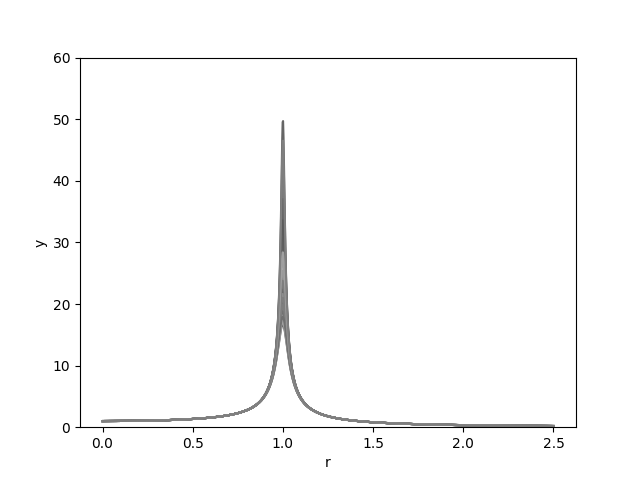

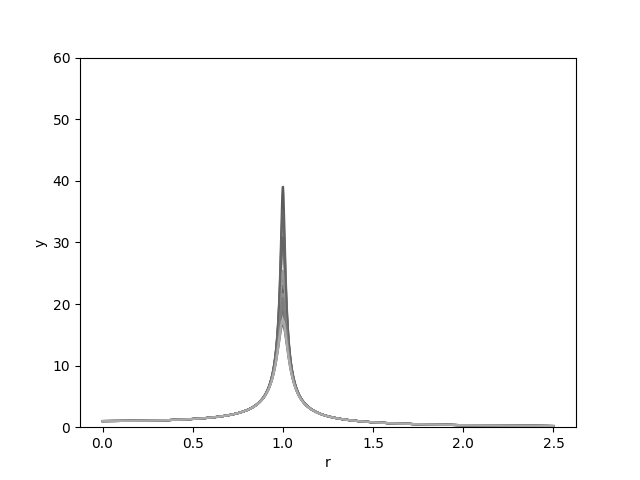

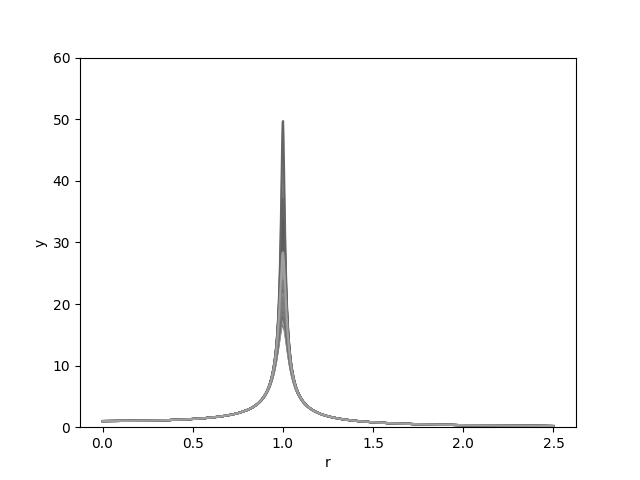

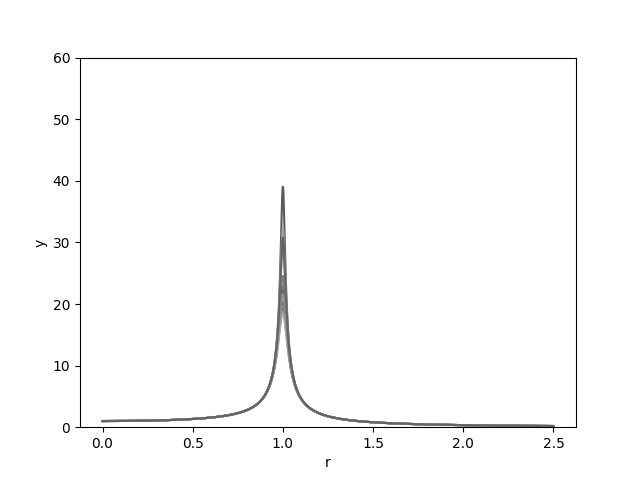

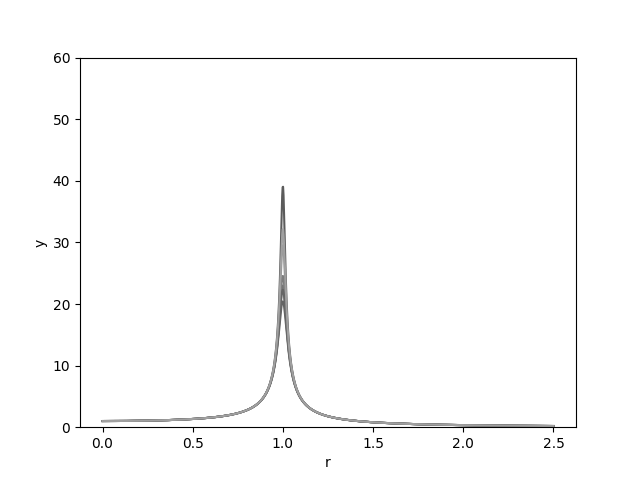

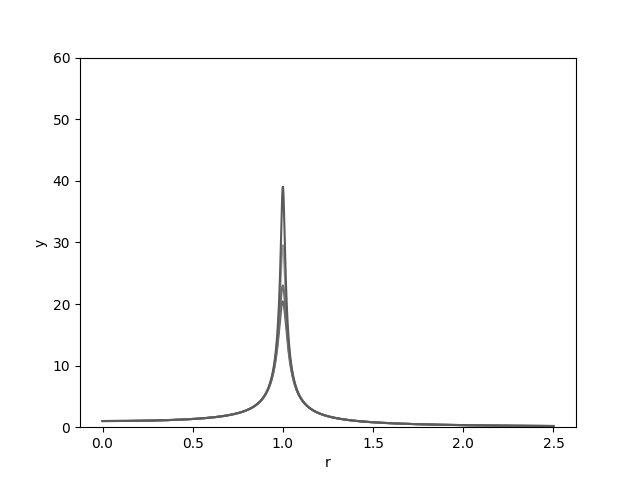

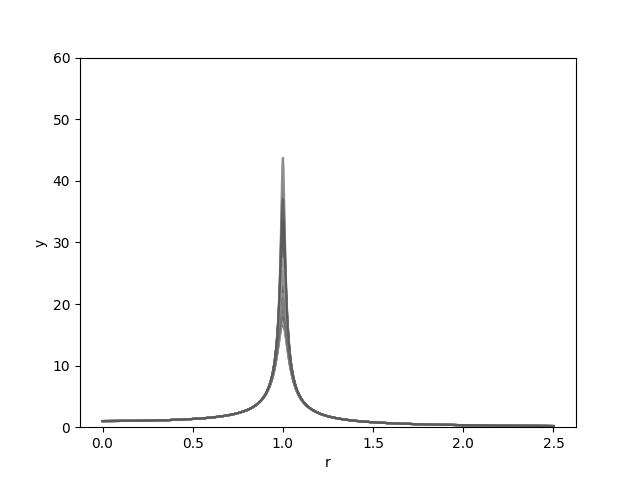

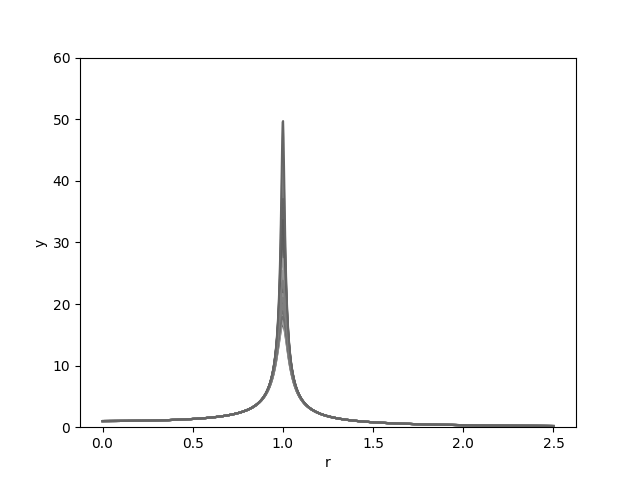

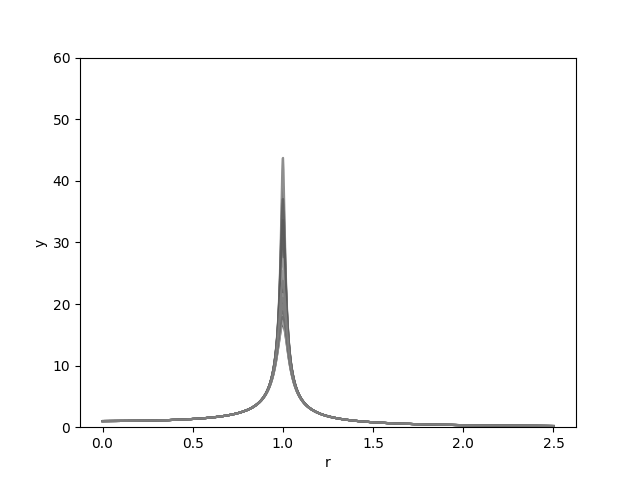

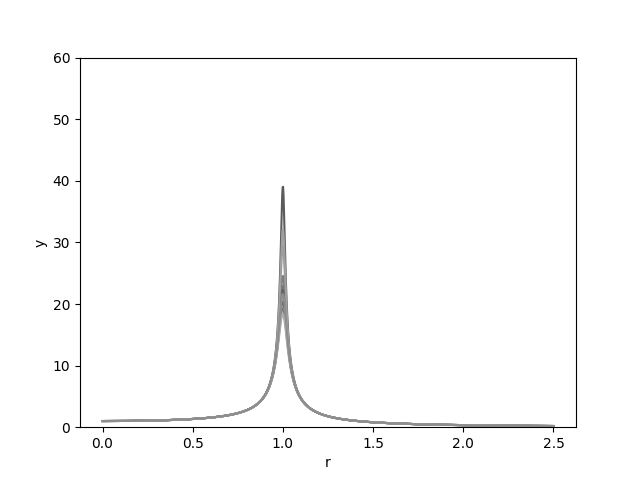

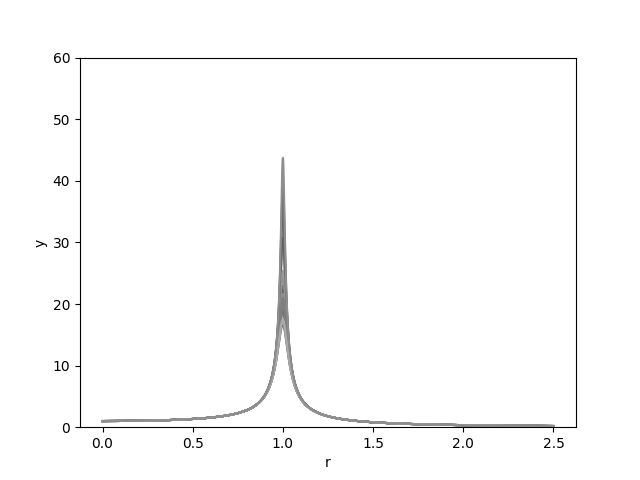

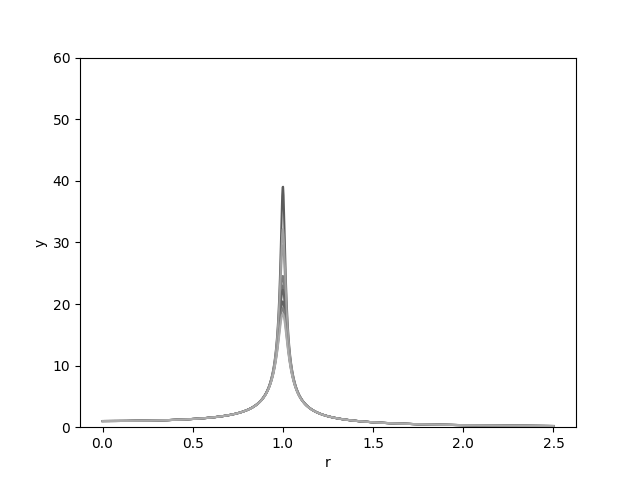

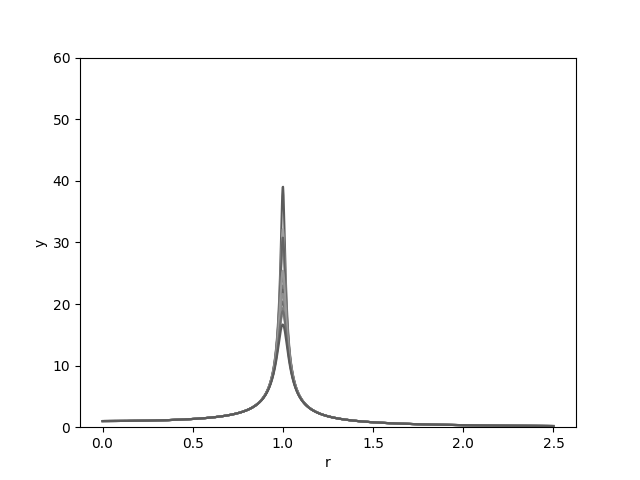

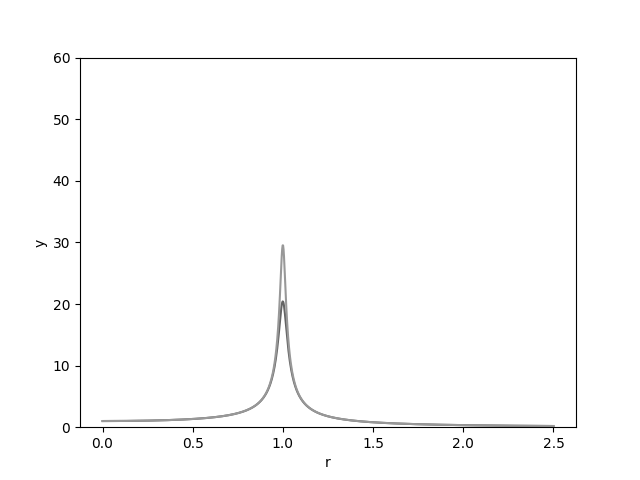

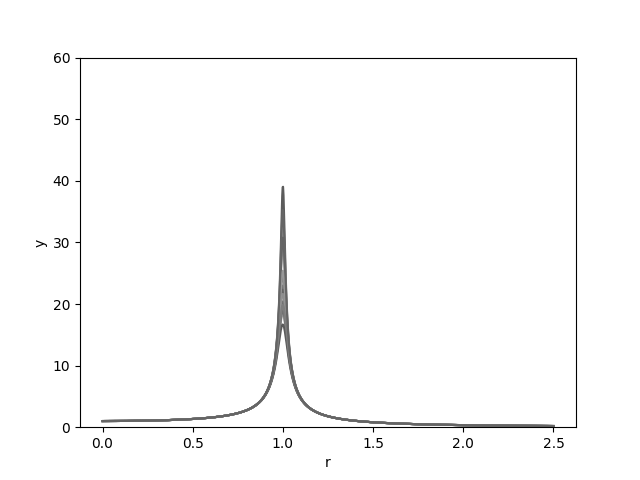

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
import keras
graph_dir = "my_test_grayscale_graphs"
if not os.path.exists(graph_dir):
    os.makedirs(graph_dir)

existing_graphs="my_test_graphs"
labels = ["zeta = {:.4f}".format(z) for z in zeta]
files = os.listdir(existing_graphs)

for file in files:
    file_path = os.path.join(existing_graphs, file)
    image = cv2.imread(file_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray_image)
    grayscale_image_path = os.path.join(graph_dir, "grayscale_" + file)
    cv2.imwrite(grayscale_image_path, gray_image)

graph_dir = "my_test_resized_grayscale_graphs"
if not os.path.exists(graph_dir):
    os.makedirs(graph_dir)

existing_graphs="my_test_grayscale_graphs"
files = os.listdir(existing_graphs)
for file in files:
    file_path = os.path.join(existing_graphs, file)
    image = Image.open(file_path)
    resized_image = image.resize((256, 256))
    image_path = os.path.join(graph_dir, "RESIZED_" + file)
    resized_image.save(image_path)
# Get the list of image files
image_files = os.listdir('/content/my_test_resized_grayscale_graphs')
x_test = []

for image_file in image_files:
    image = cv2.imread(f'/content/my_test_resized_grayscale_graphs/{image_file}',0)
    image_array = np.array(image)
    x_test.append(image_array)

x_test = np.array(x_test)
x_test=x_test/255

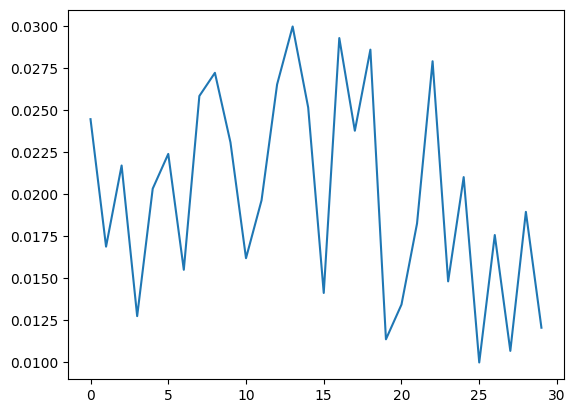

In [ ]:
# print(zeta)
plt.plot(zeta)


In [ ]:
loss, accuracy = model.evaluate(x_test, zeta)

1/1 [==============================] - 1s 647ms/step - loss: 1.1906e-04 - root_mean_squared_error: 0.0109


In [ ]:
# from keras.models import load_model

# # Load the model
# model = load_model('my_model_linear_with flatten.h5')

In [ ]:
prediction=model.predict(x_test)

1/1 [==============================] - 1s 604ms/step


In [ ]:
print((prediction.shape))

(30, 1)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 262144)            0         
                                                                 
 dense (Dense)               (None, 64)                16777280  
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                        

[[0.01737535]
 [0.01737535]
 [0.02085245]
 [0.0136323 ]
 [0.00792897]
 [0.00985265]
 [0.02116883]
 [0.01358354]
 [0.01358354]
 [0.01381338]
 [0.02116883]
 [0.02123845]
 [0.00950503]
 [0.00515771]
 [0.00985265]
 [0.02095306]
 [0.02074611]
 [0.00792921]
 [0.02006221]
 [0.02123845]
 [0.00486279]
 [0.01358211]
 [0.02123845]
 [0.00383806]
 [0.00503135]
 [0.02116883]
 [0.00805759]
 [0.02116883]
 [0.00829923]
 [0.02123845]]


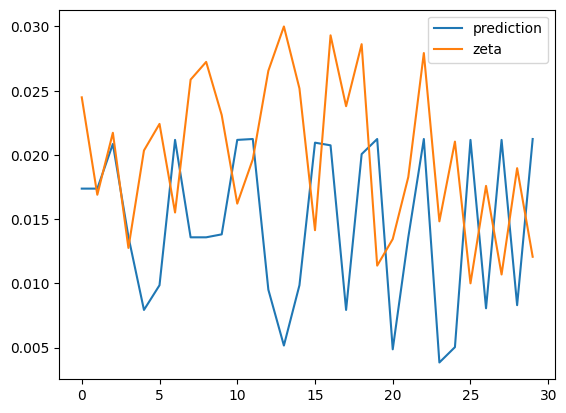

In [ ]:
print((prediction))
plt.plot(prediction,label="prediction")
plt.plot(zeta, label="zeta")
plt.legend()
plt.show()